In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. 데이터 불러오기
data = pd.read_csv("C:/py_workspace/korea_py/prj_st/pt_train_dt.csv")
x_data = data.iloc[:,2:-4]
y_data = data.iloc[:,-4:-1]

In [3]:
# 2. 데이터 전처리
# 2.1. 결측치 처리

# 열별 결측치 확인
print('< 열별 결측치 확인 >\n')
print(x_data.isnull().sum(0))

# 결측치가 없는 열의 갯수
print(f'\n결측치가 없는 열의 갯수 : {np.array(x_data.isnull().sum(0)==0).sum()}\n')

# 행별 결측치 확인
print('\n< 행별 결측치 확인 >\n')
print(x_data.isnull().sum(1))

# 결측치가 없는 행의 갯수
print(f'\n결측치가 없는 행의 갯수 : {np.array(x_data.isnull().sum(1)==0).sum()}\n')

< 열별 결측치 확인 >

x_1       2596
x_2       2594
x_3       2594
x_4       2596
x_5       2594
x_6       2594
x_7       2596
x_8       2594
x_9       2594
x_10     10079
x_11     10080
x_12     10083
x_13     10083
x_14     10083
x_15     10084
x_16     10085
x_17     10087
x_18     10089
x_19     10092
x_20      2295
x_21      2534
x_22      2535
x_23      2536
x_24      2535
x_25      2537
x_26      2535
x_27      2535
x_28      2535
x_29      2541
x_30      4605
         ...  
x_371     4129
x_372     4132
x_373     4172
x_374     4092
x_375     4093
x_376     3730
x_377     3724
x_378    14149
x_379     3738
x_380     3724
x_381     3757
x_382     3757
x_383     3759
x_384     3757
x_385     3757
x_386     3758
x_387     6963
x_388     3722
x_389     3722
x_390      495
x_391      496
x_392      543
x_393      496
x_394      514
x_395      528
x_396      532
x_397      541
x_398      541
x_399      541
x_400      542
Length: 400, dtype: int64

결측치가 없는 열의 갯수 : 0


< 행별 결측치 확인 >

0       

==> 결측치가 포함된 열을 제거하는 로직보다는 결측치가 포함된 행을 제거하는 것이 좋아보임.

In [4]:
# (1) 결측치가 포함된 모든 행을 제거
x_drop_all = x_data.dropna(axis=0)
y_drop_all = y_data.loc[x_drop_all.index]

==> 결측치가 포함된 모든 행을 제거하여도 충분히 많은 관측치가 존재하므로 결측치 모두 제거하는 방식을 취함.  
만약 결측치를 대체하는 방식을 취하고 싶다면 아래 2 line 실행하면 됨.

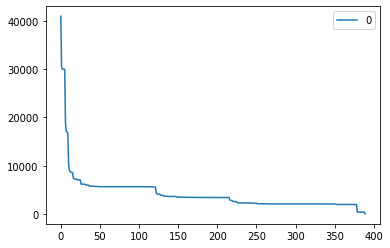

In [5]:
# (2) 결측치가 n개 이상인 행만을 제거
# 결측치 개수에 따라 삭제되는 행의 개수
numna_list = []
for i in range(0, x_data.isnull().sum(1).max(), 1):
    numna_list.append(np.array(x_data.isnull().sum(1)>i).sum())
    
pd.DataFrame(numna_list).plot()

==> 결측치 50개 이상 포함인 행 삭제로 결정

In [6]:
# 결측치 50개 이상 포함한 행 삭제
x_drop_50 = x_data.loc[x_data.isnull().sum(1)<=50]
y_drop_50  = y_data.loc[x_drop_50.index]

#   (1) 결측값을 0으로 채우기
x_drop_50_0 = x_drop_50.fillna(0)

#   (2) 결측값을 앞 방향 혹은 뒷 방향으로 채우기 
x_drop_50_f = x_drop_50.fillna(method='ffill') 
x_drop_50_b = x_drop_50.fillna(method='bfill')

#   (3) 결측값을 변수별 평균으로 대체
x_drop_50_m = x_drop_50.fillna(x_drop_50.mean())

#   (4) 결측값을 중앙값으로 대체
x_drop_50_med = x_drop_50.fillna(x_drop_50.median())

#   (5) 결측값을 최빈값으로 대체
x_drop_50_med = x_drop_50.fillna(x_drop_50.median())

In [7]:
x_corr=x_drop_all.loc[:,'x_147':'x_158'].corr()

In [8]:
x_corr.style.background_gradient(cmap='coolwarm')

In [9]:
# # 2.2. 데이터 살펴보기
# # correlation matrix
# corr_mat = x_drop_all.corr()
# corr_mat.style.background_gradient(cmap='coolwarm')

==> correlation matrix를 살펴 본 결과, 중복 열(correlation=1)의 존재 확인

In [10]:
# 중복 제거 전 data shape
print(f'중복 제거 전 : {x_drop_all.shape}')

#중복 행 제거
x_drop_all = x_drop_all.drop_duplicates()
y_drop_all = y_drop_all.loc[x_drop_all.index]
print(f'중복 행 제거 후 : {x_drop_all.shape}')

# 중복 열(변수) 제거
x_drop_all = x_drop_all.loc[:, ~x_drop_all.T.duplicated()]
y_drop_all = y_drop_all.loc[x_drop_all.index]
print(f'중복 열 제거 후 : {x_drop_all.shape}')

중복 제거 전 : (69175, 400)
중복 행 제거 후 : (69175, 400)
중복 열 제거 후 : (69175, 342)


==> 데이터를 살펴보았을 때 모든 행에서 같은 값을 지니는 의미없는 변수 군 파악했음.

In [11]:
# 의미없는 변수 제거
print(f'의미없는 변수 제거 전 : {x_drop_all.shape}')
x_drop_all = x_drop_all.loc[:,x_drop_all.std()!=0.0]
y_drop_all = y_drop_all.loc[x_drop_all.index]
print(f'의미없는 변수 제거 후 : {x_drop_all.shape}')

의미없는 변수 제거 전 : (69175, 342)
의미없는 변수 제거 후 : (69175, 341)


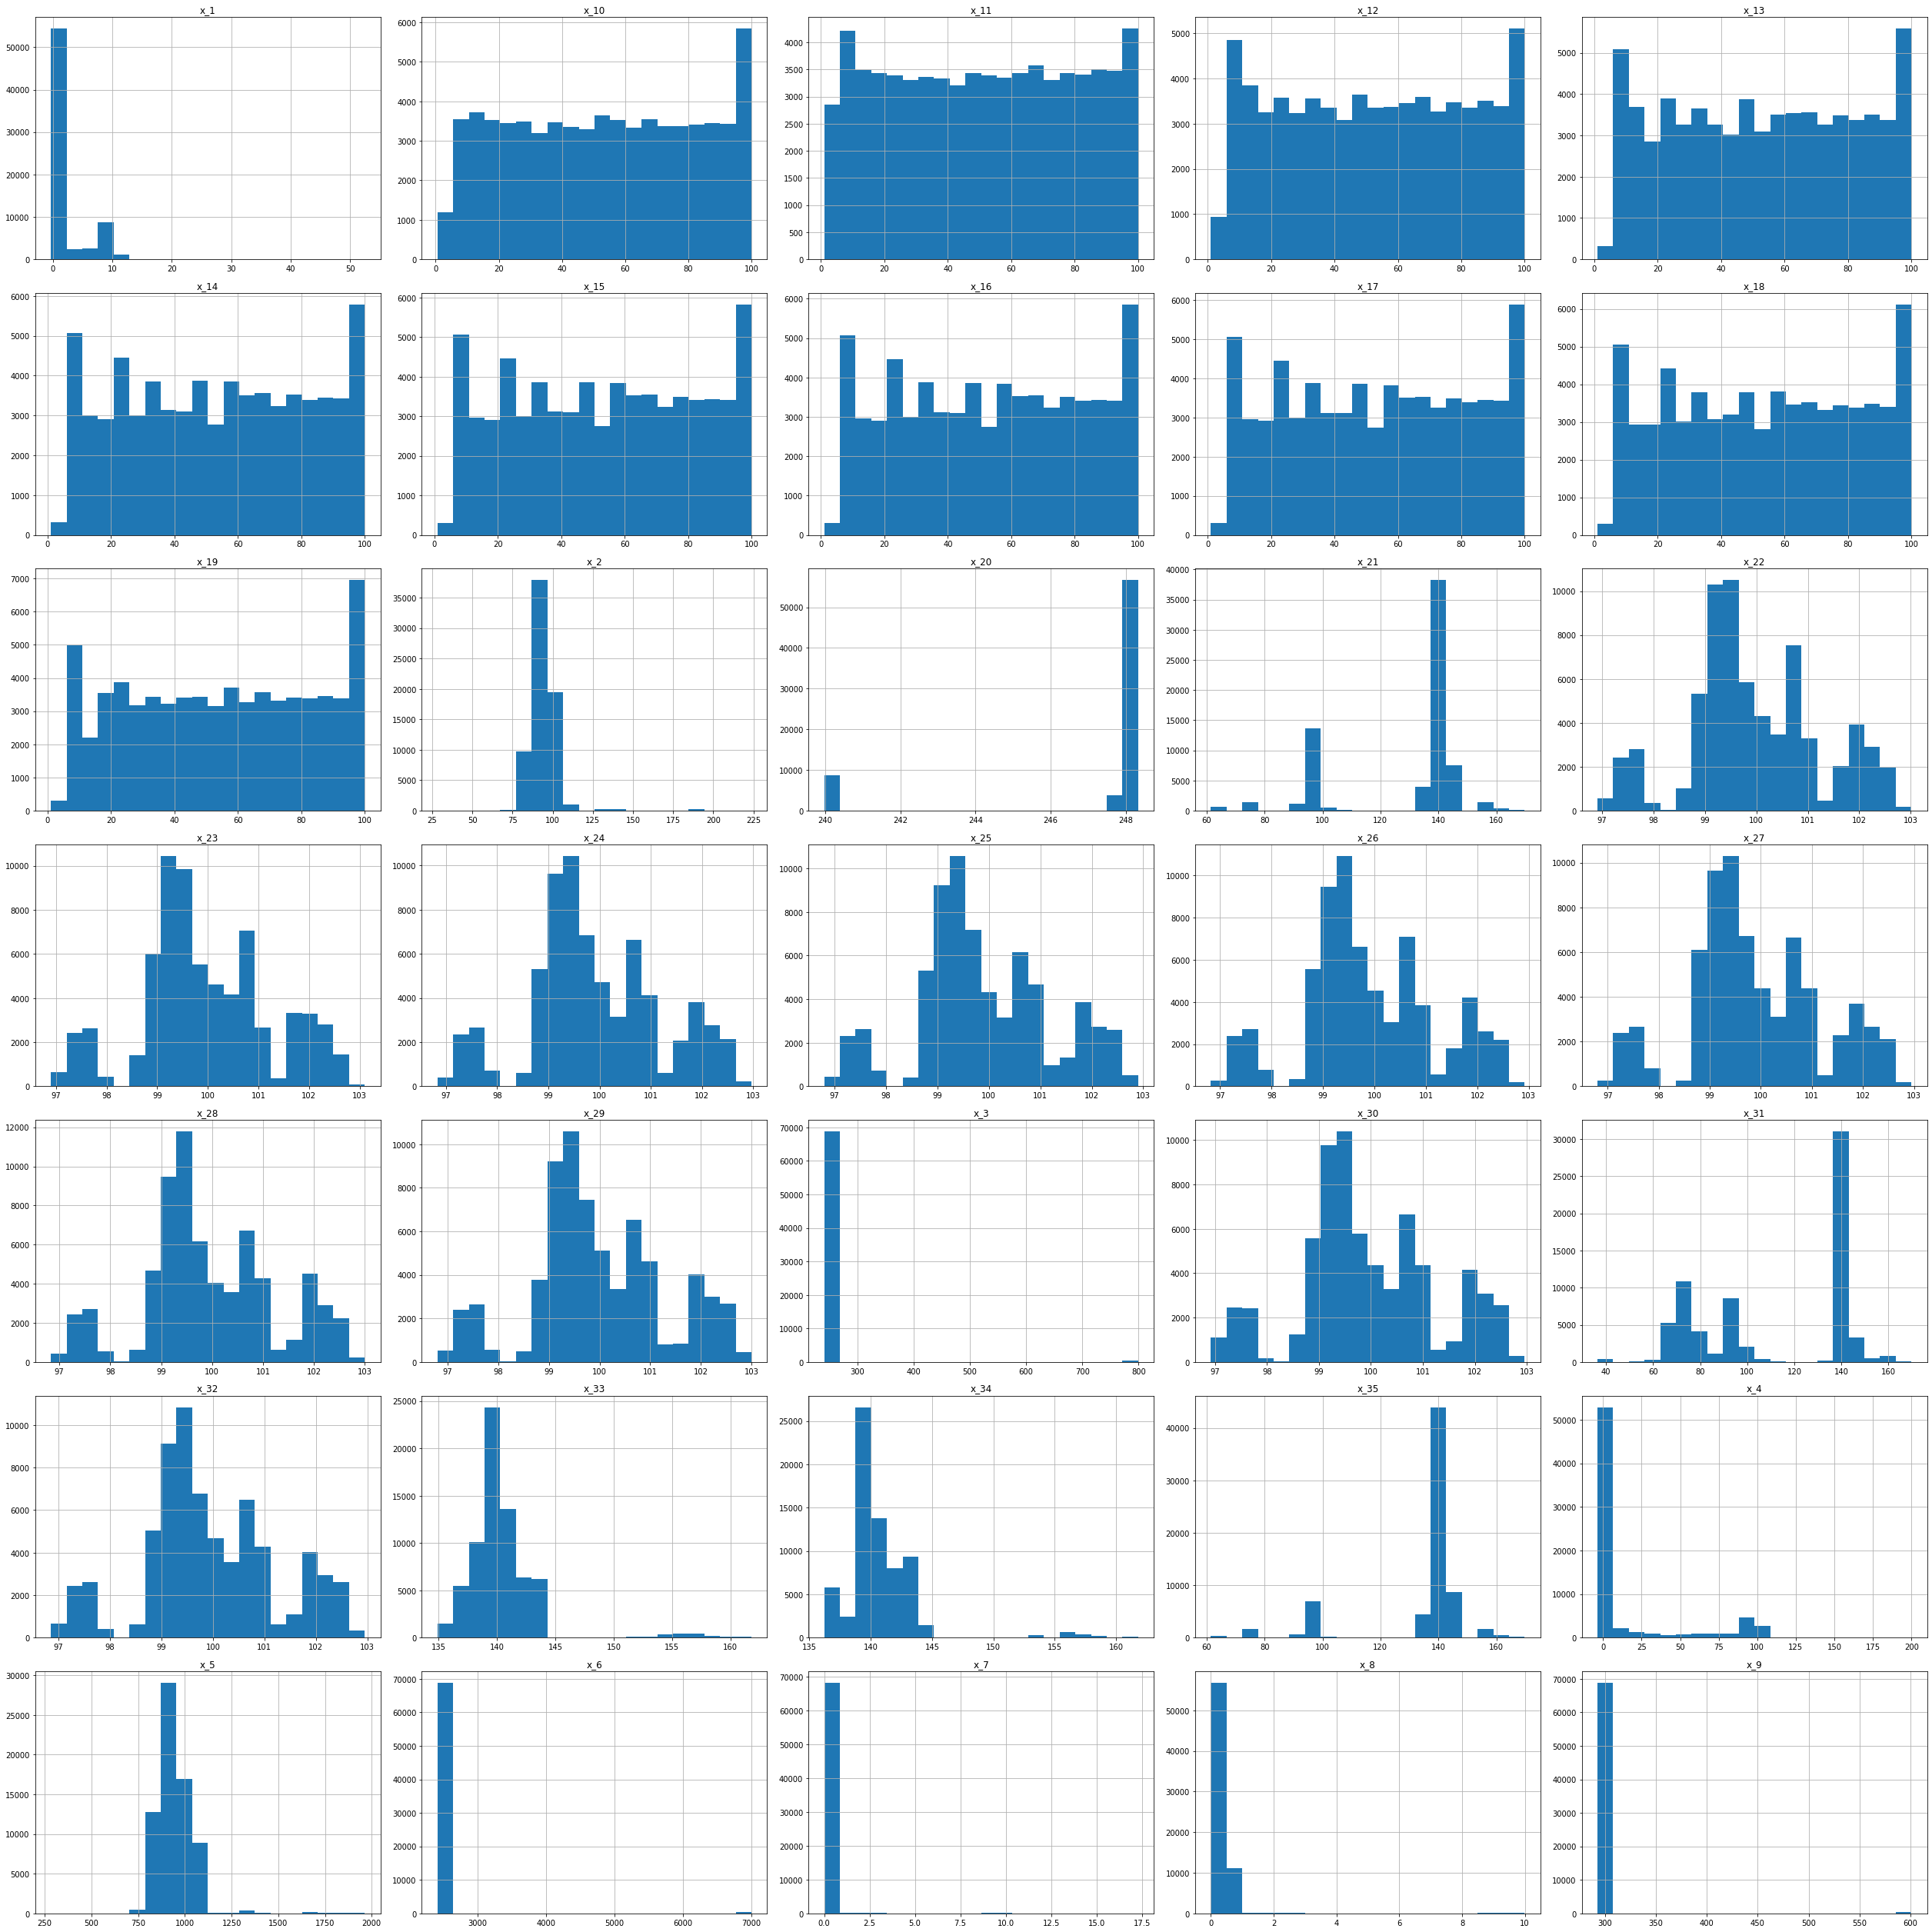

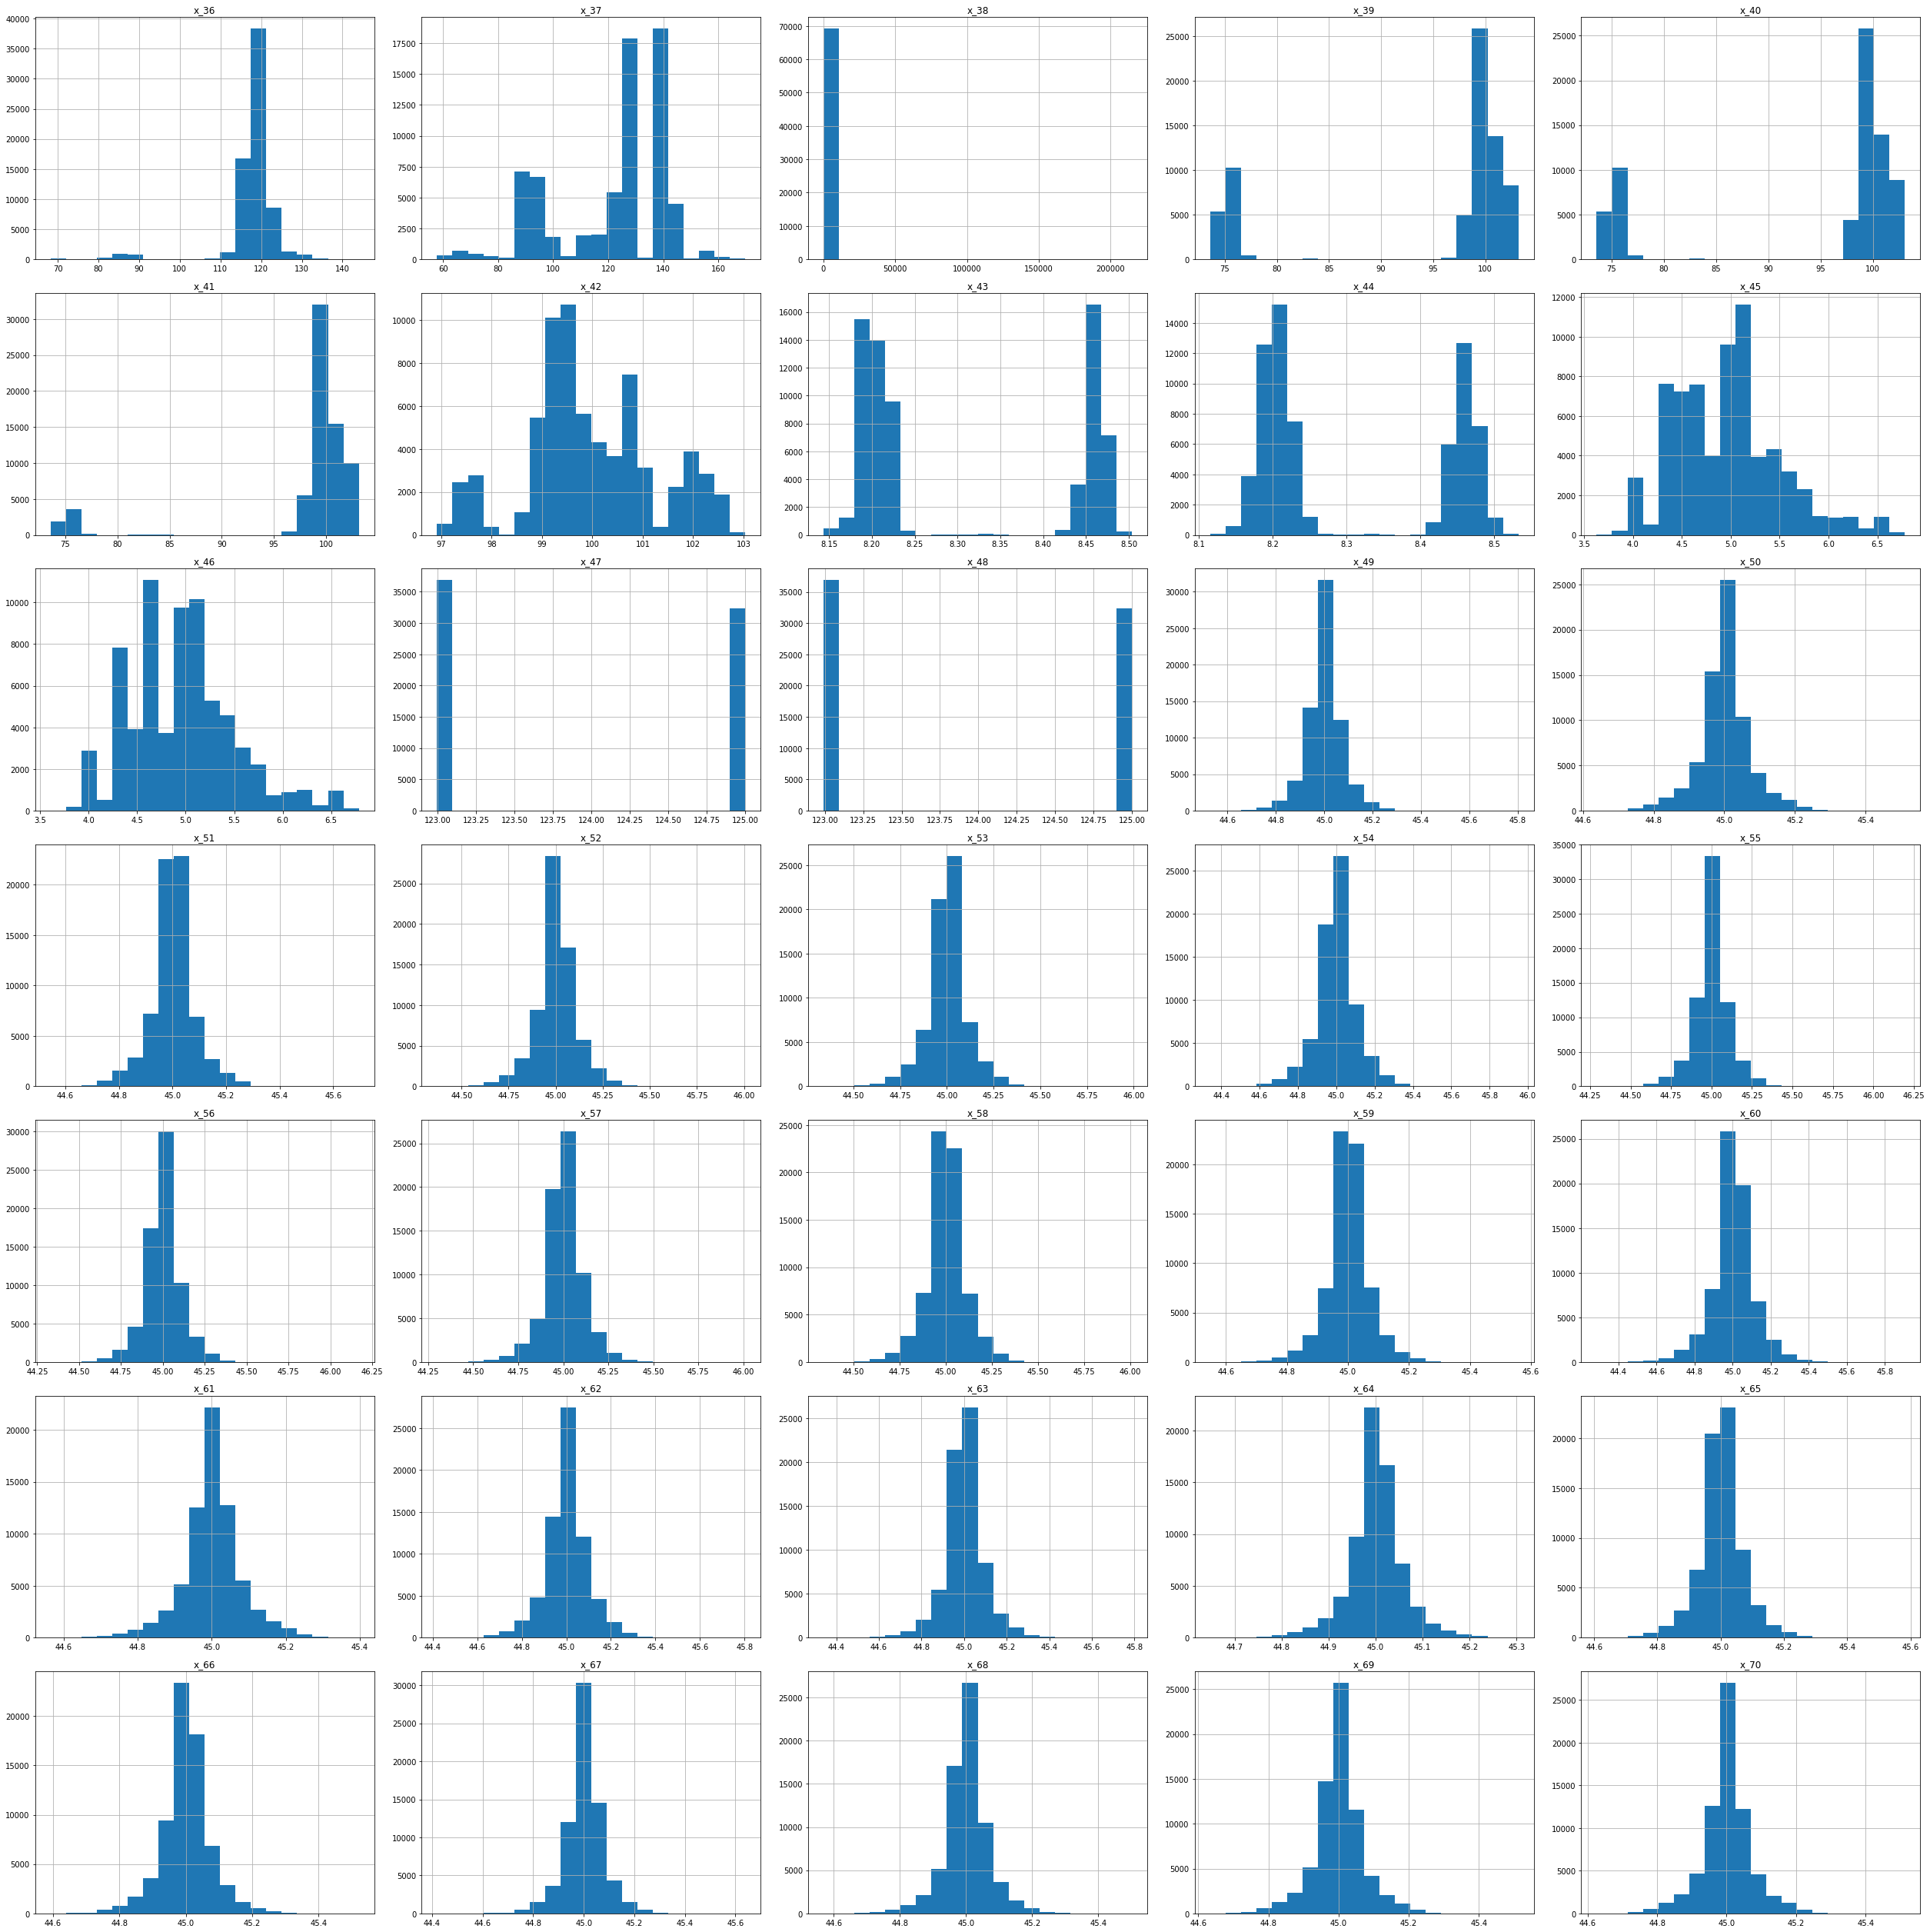

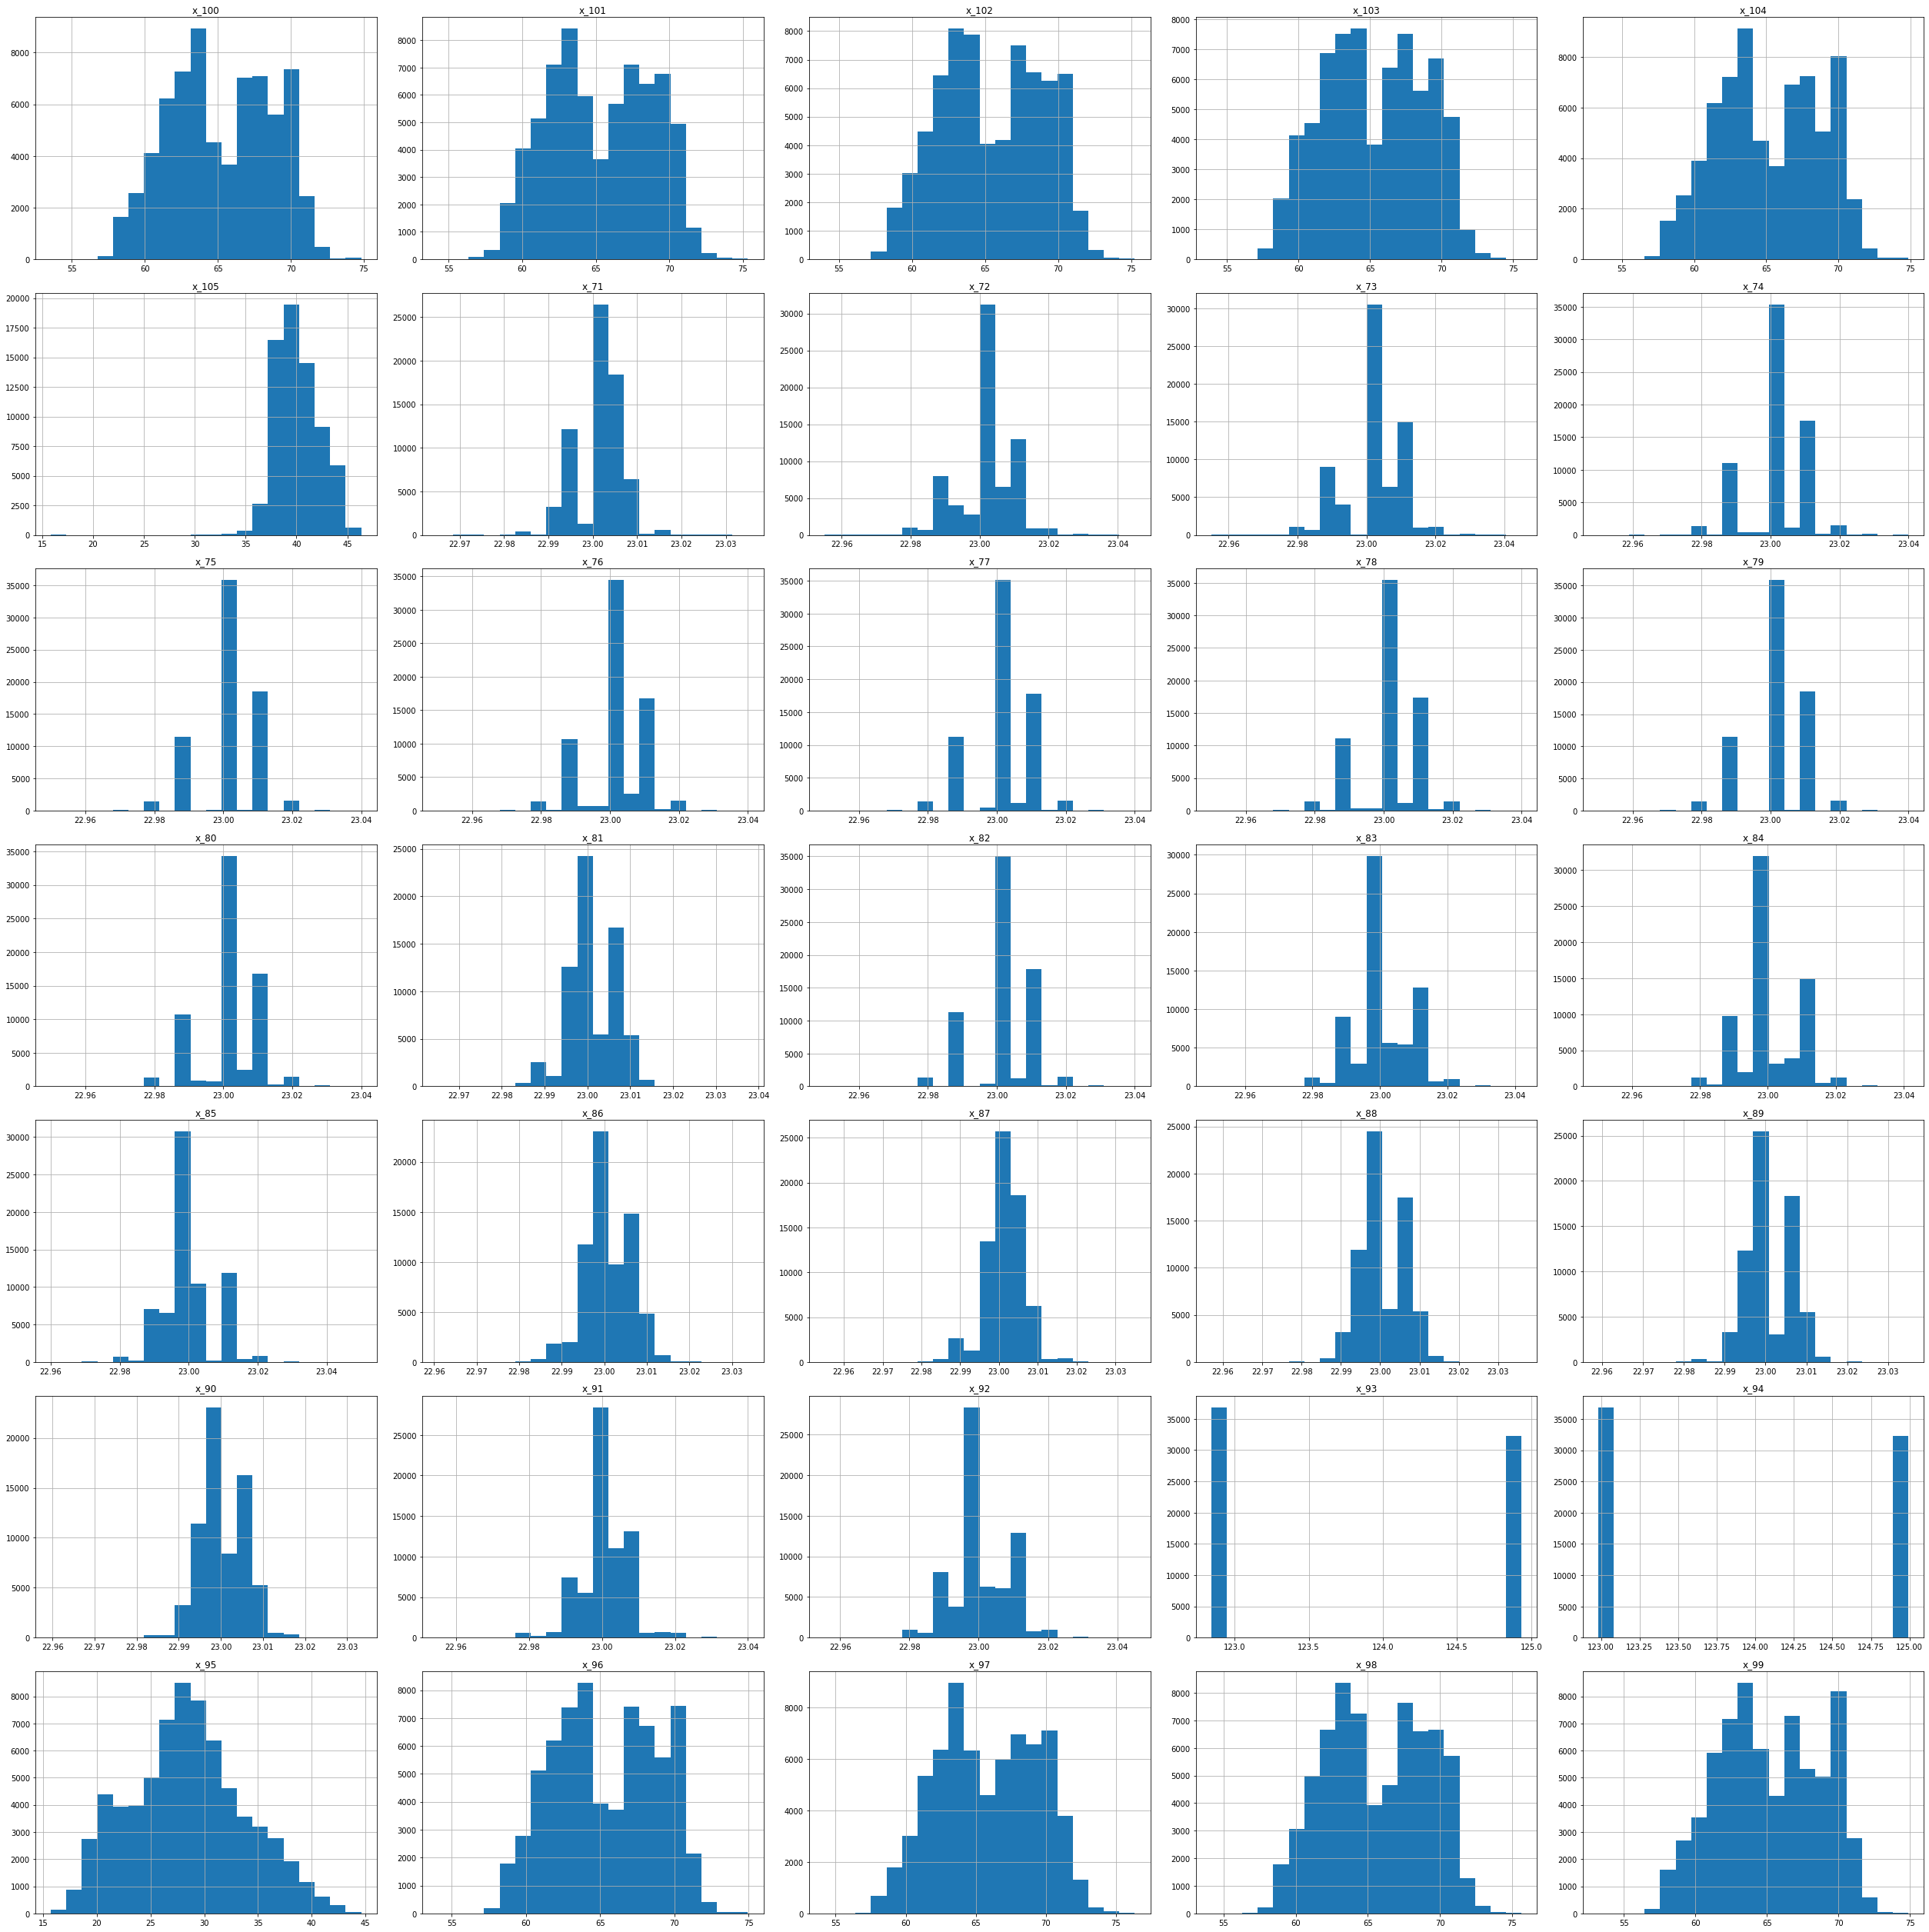

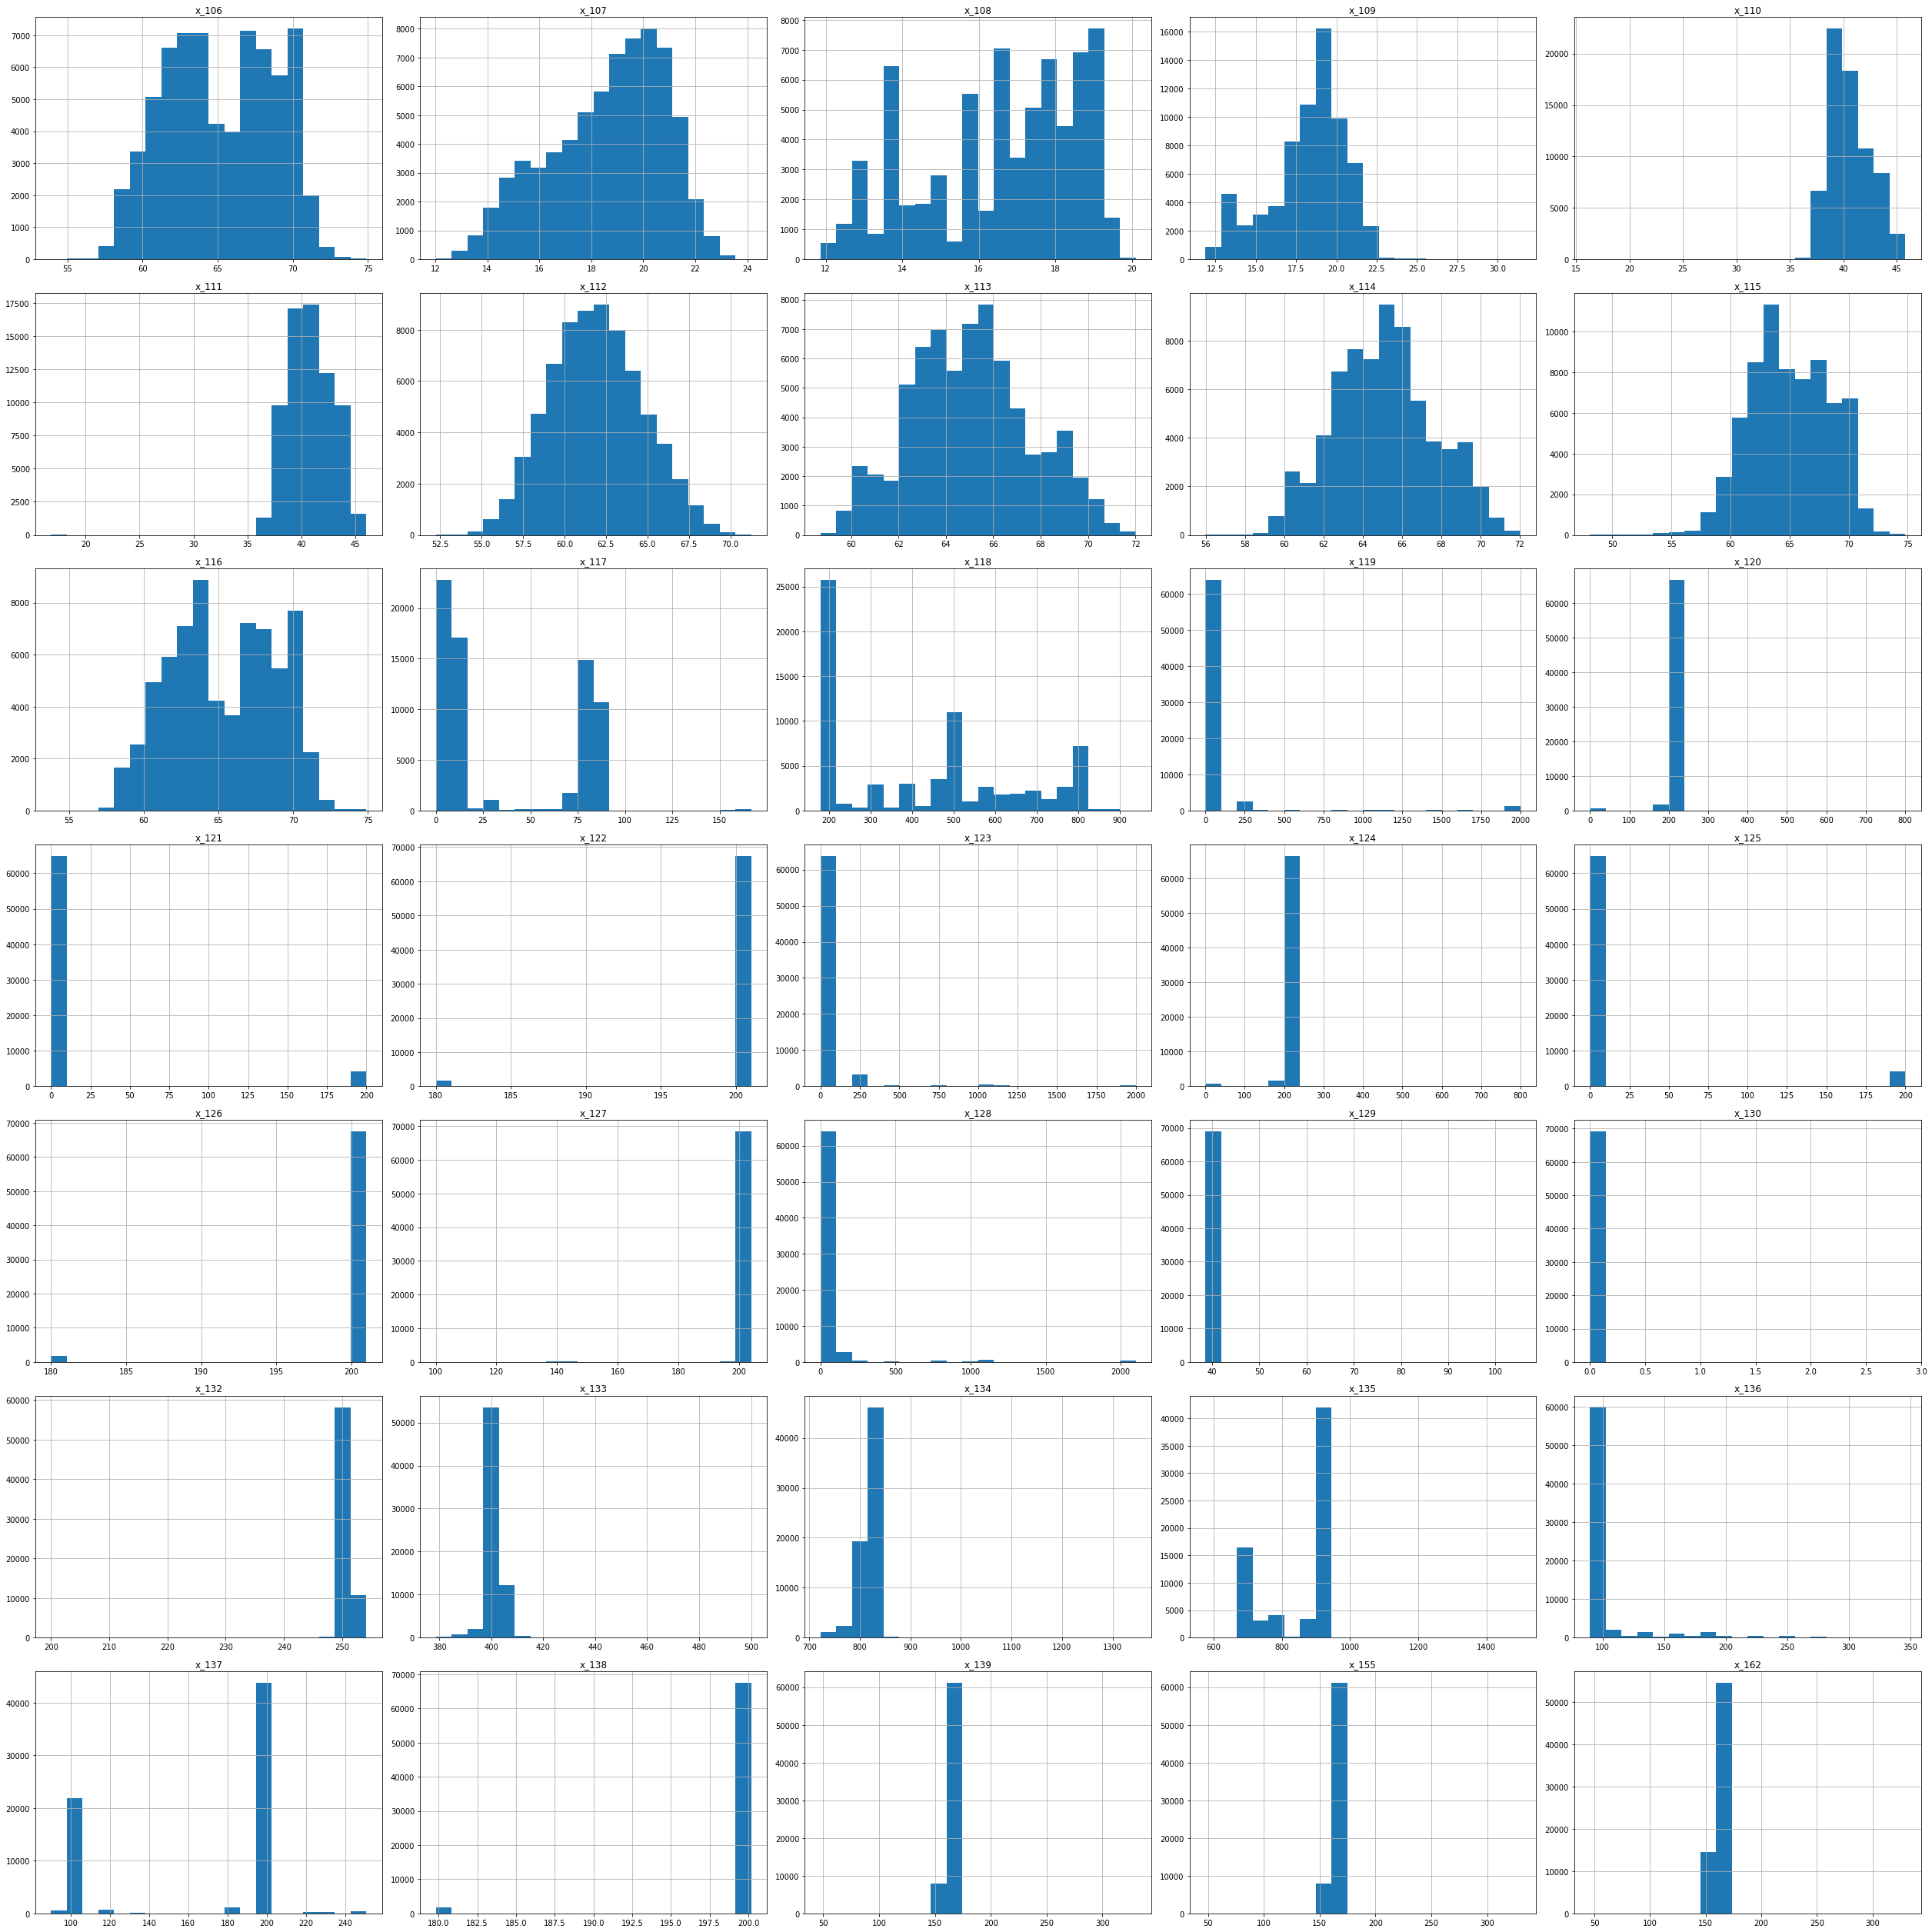

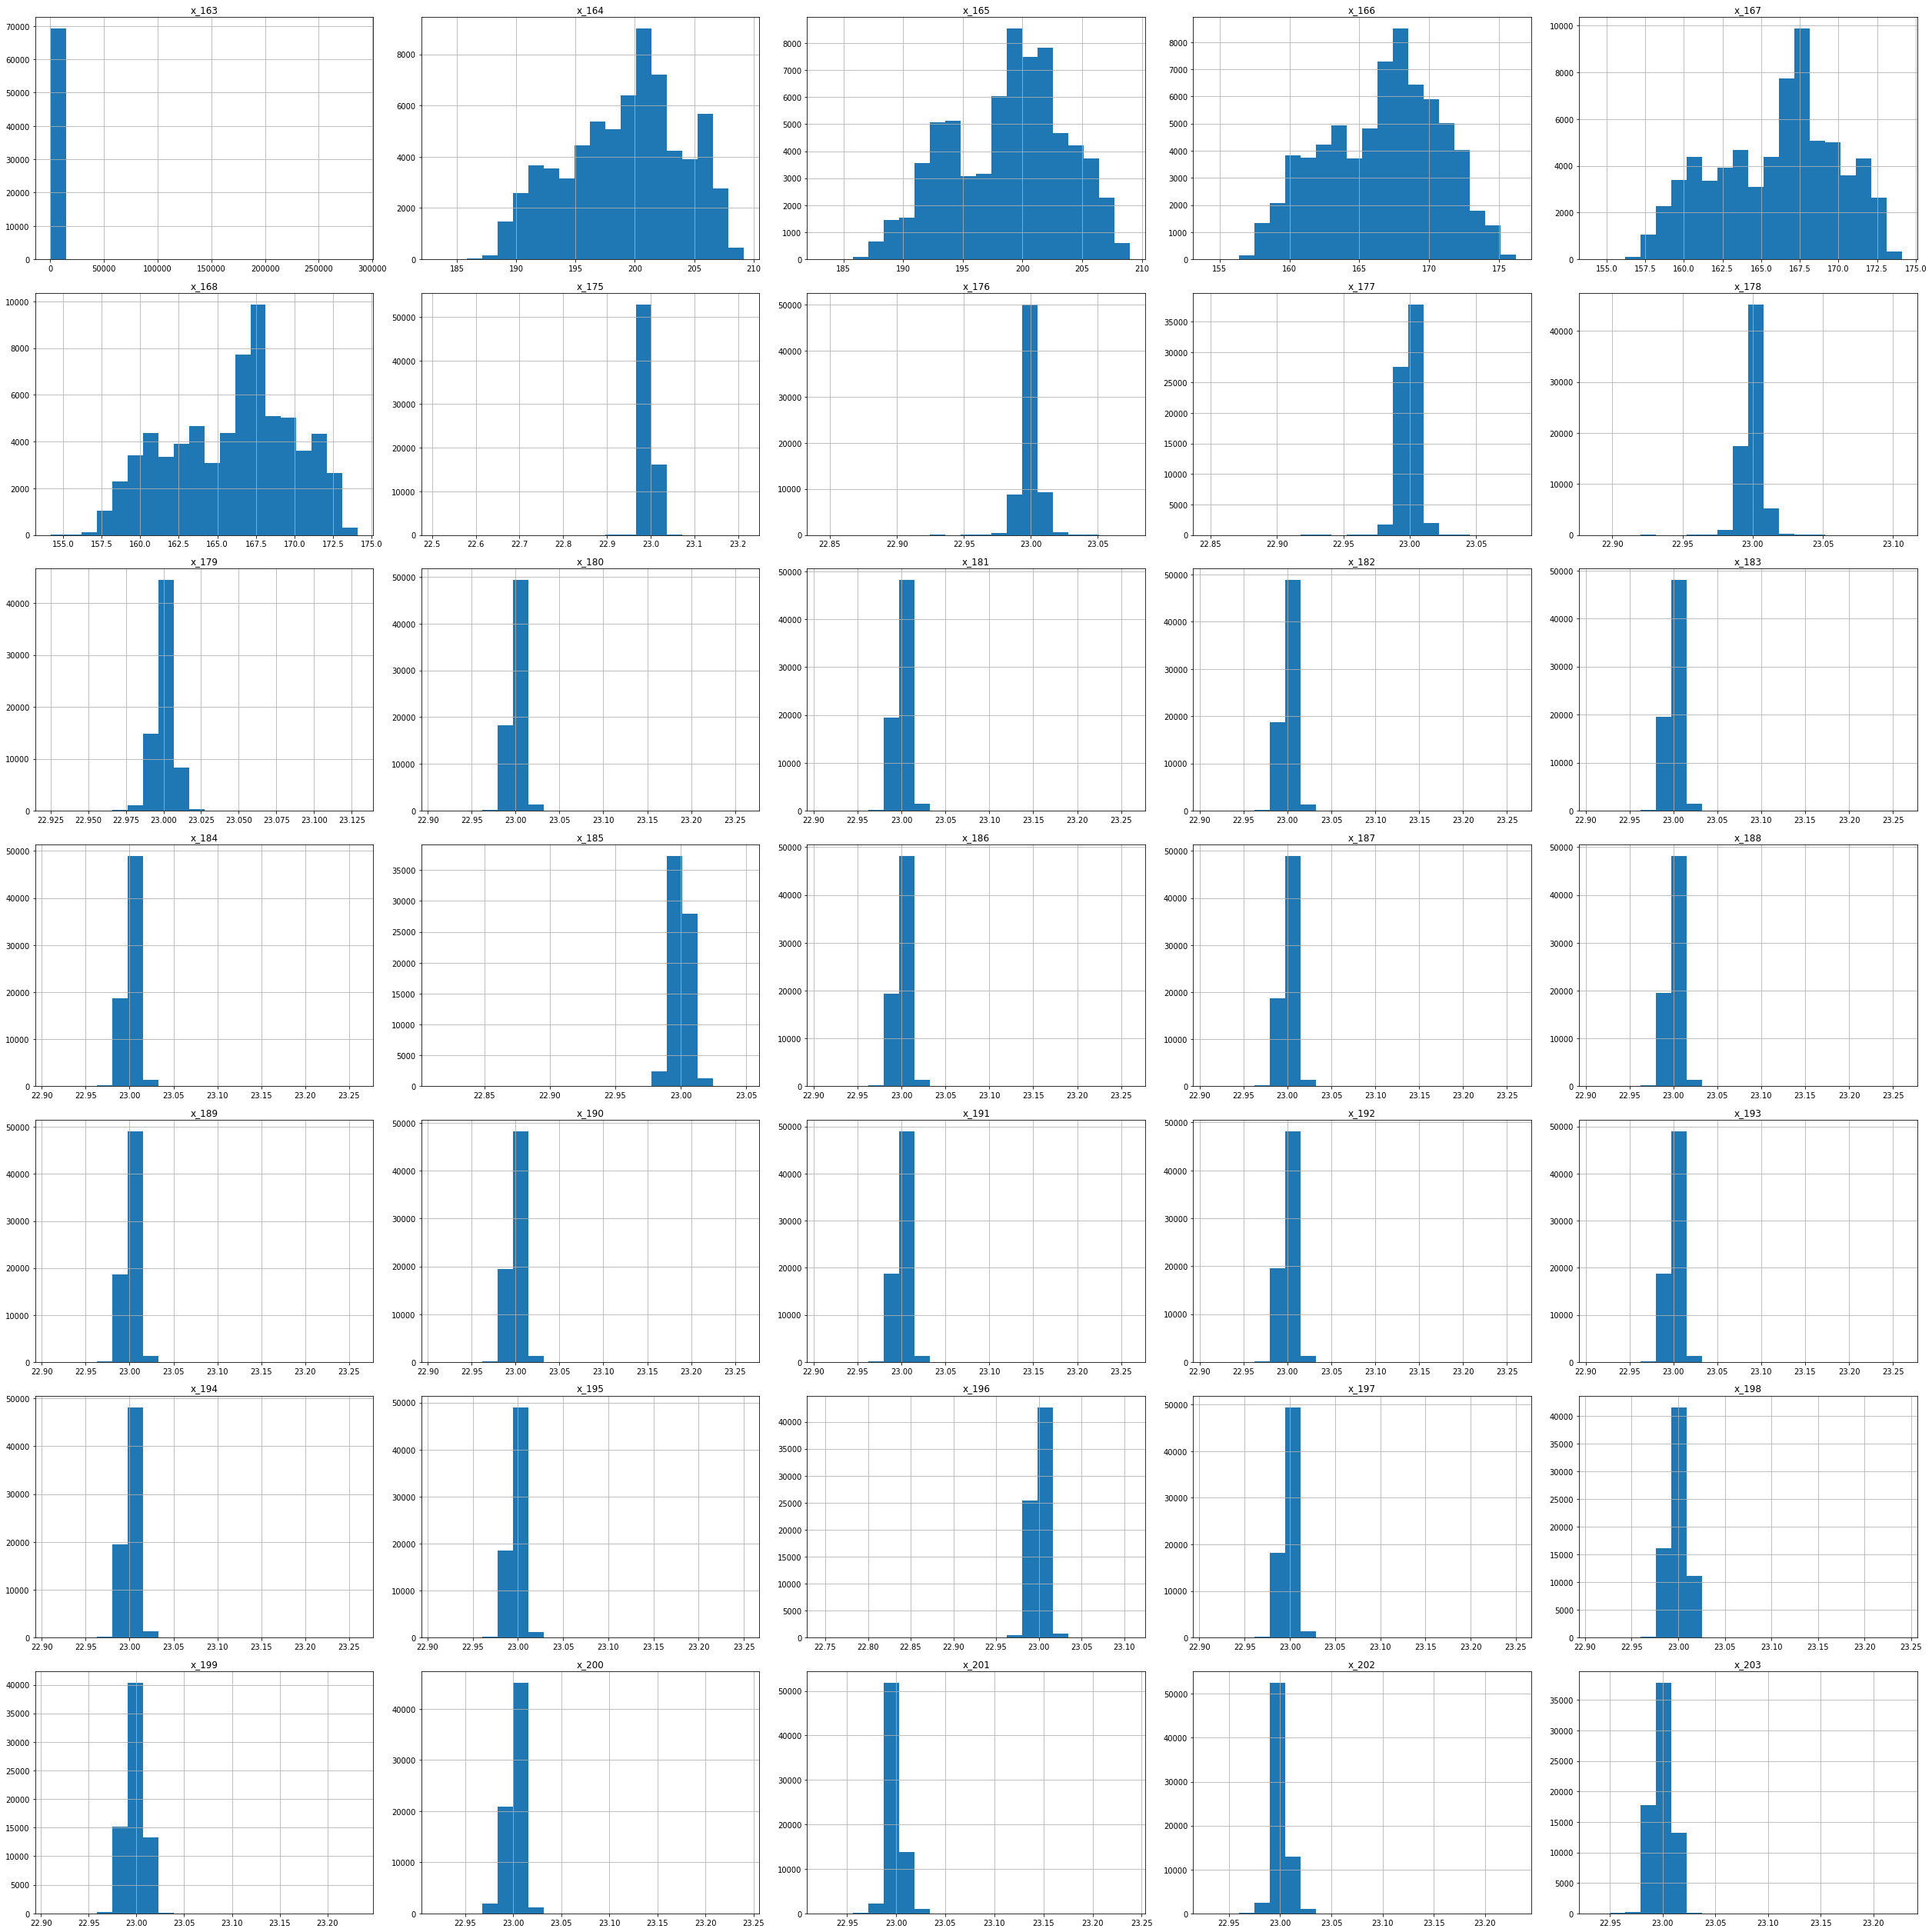

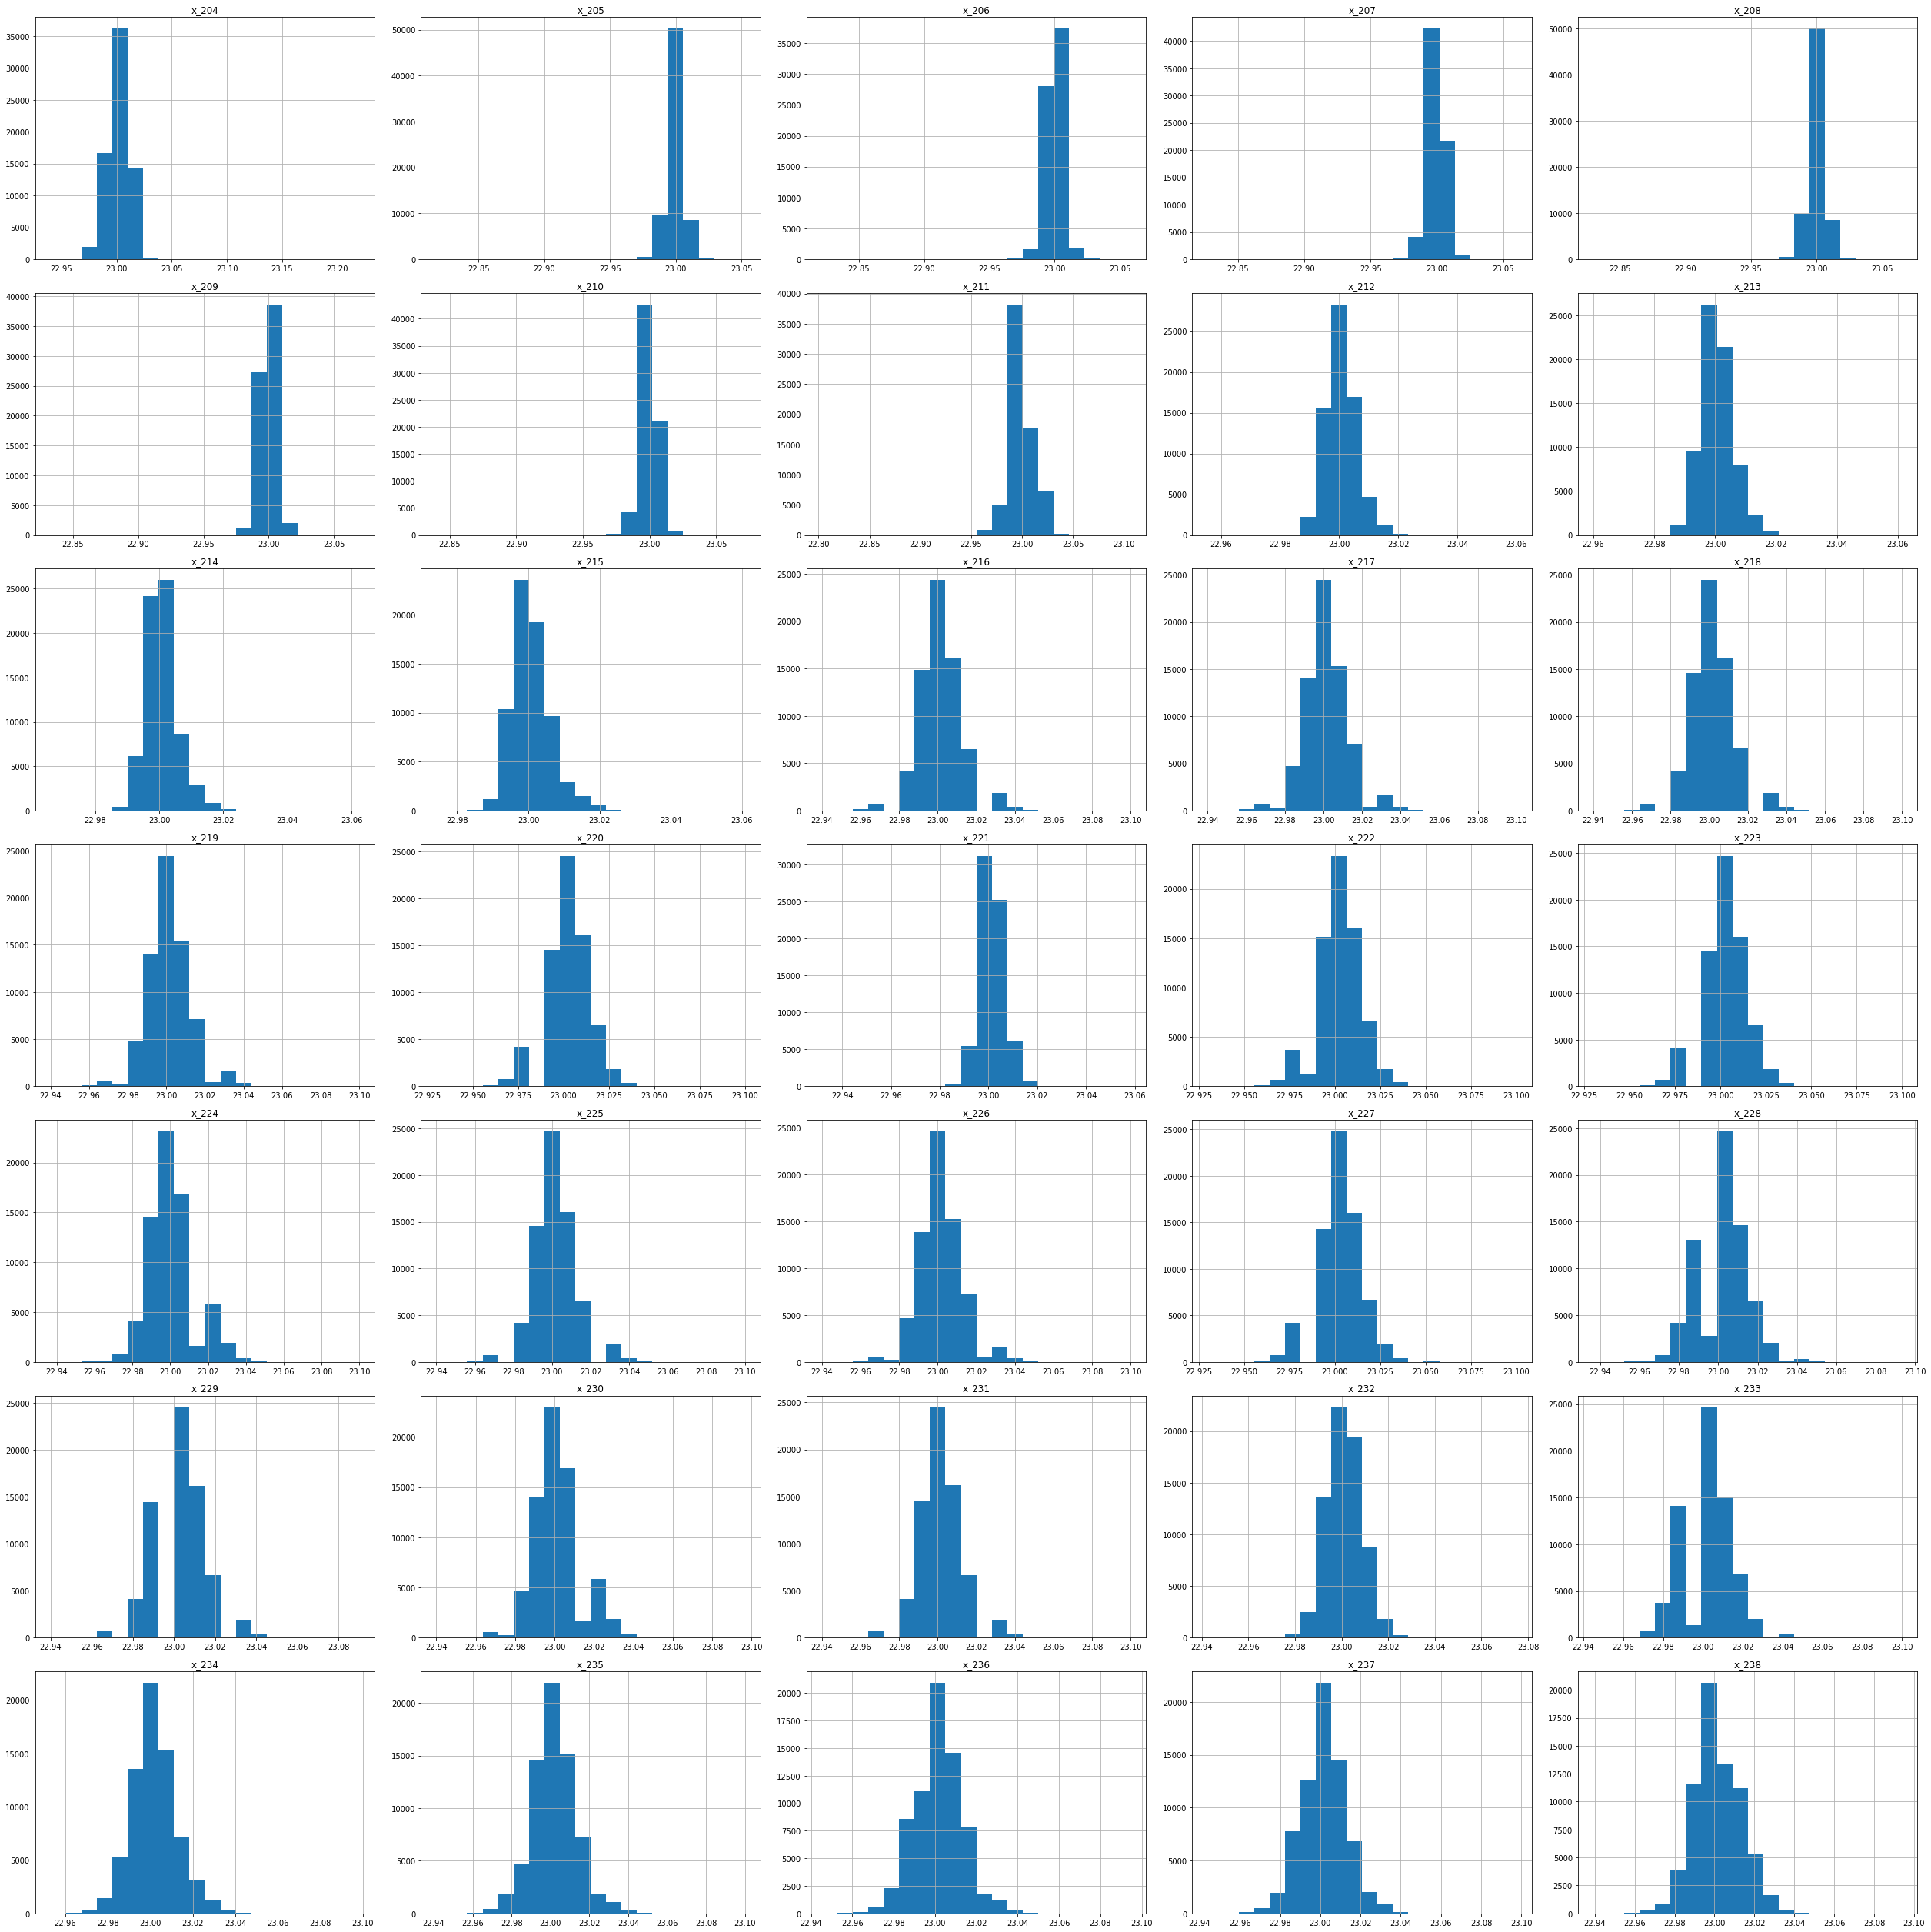

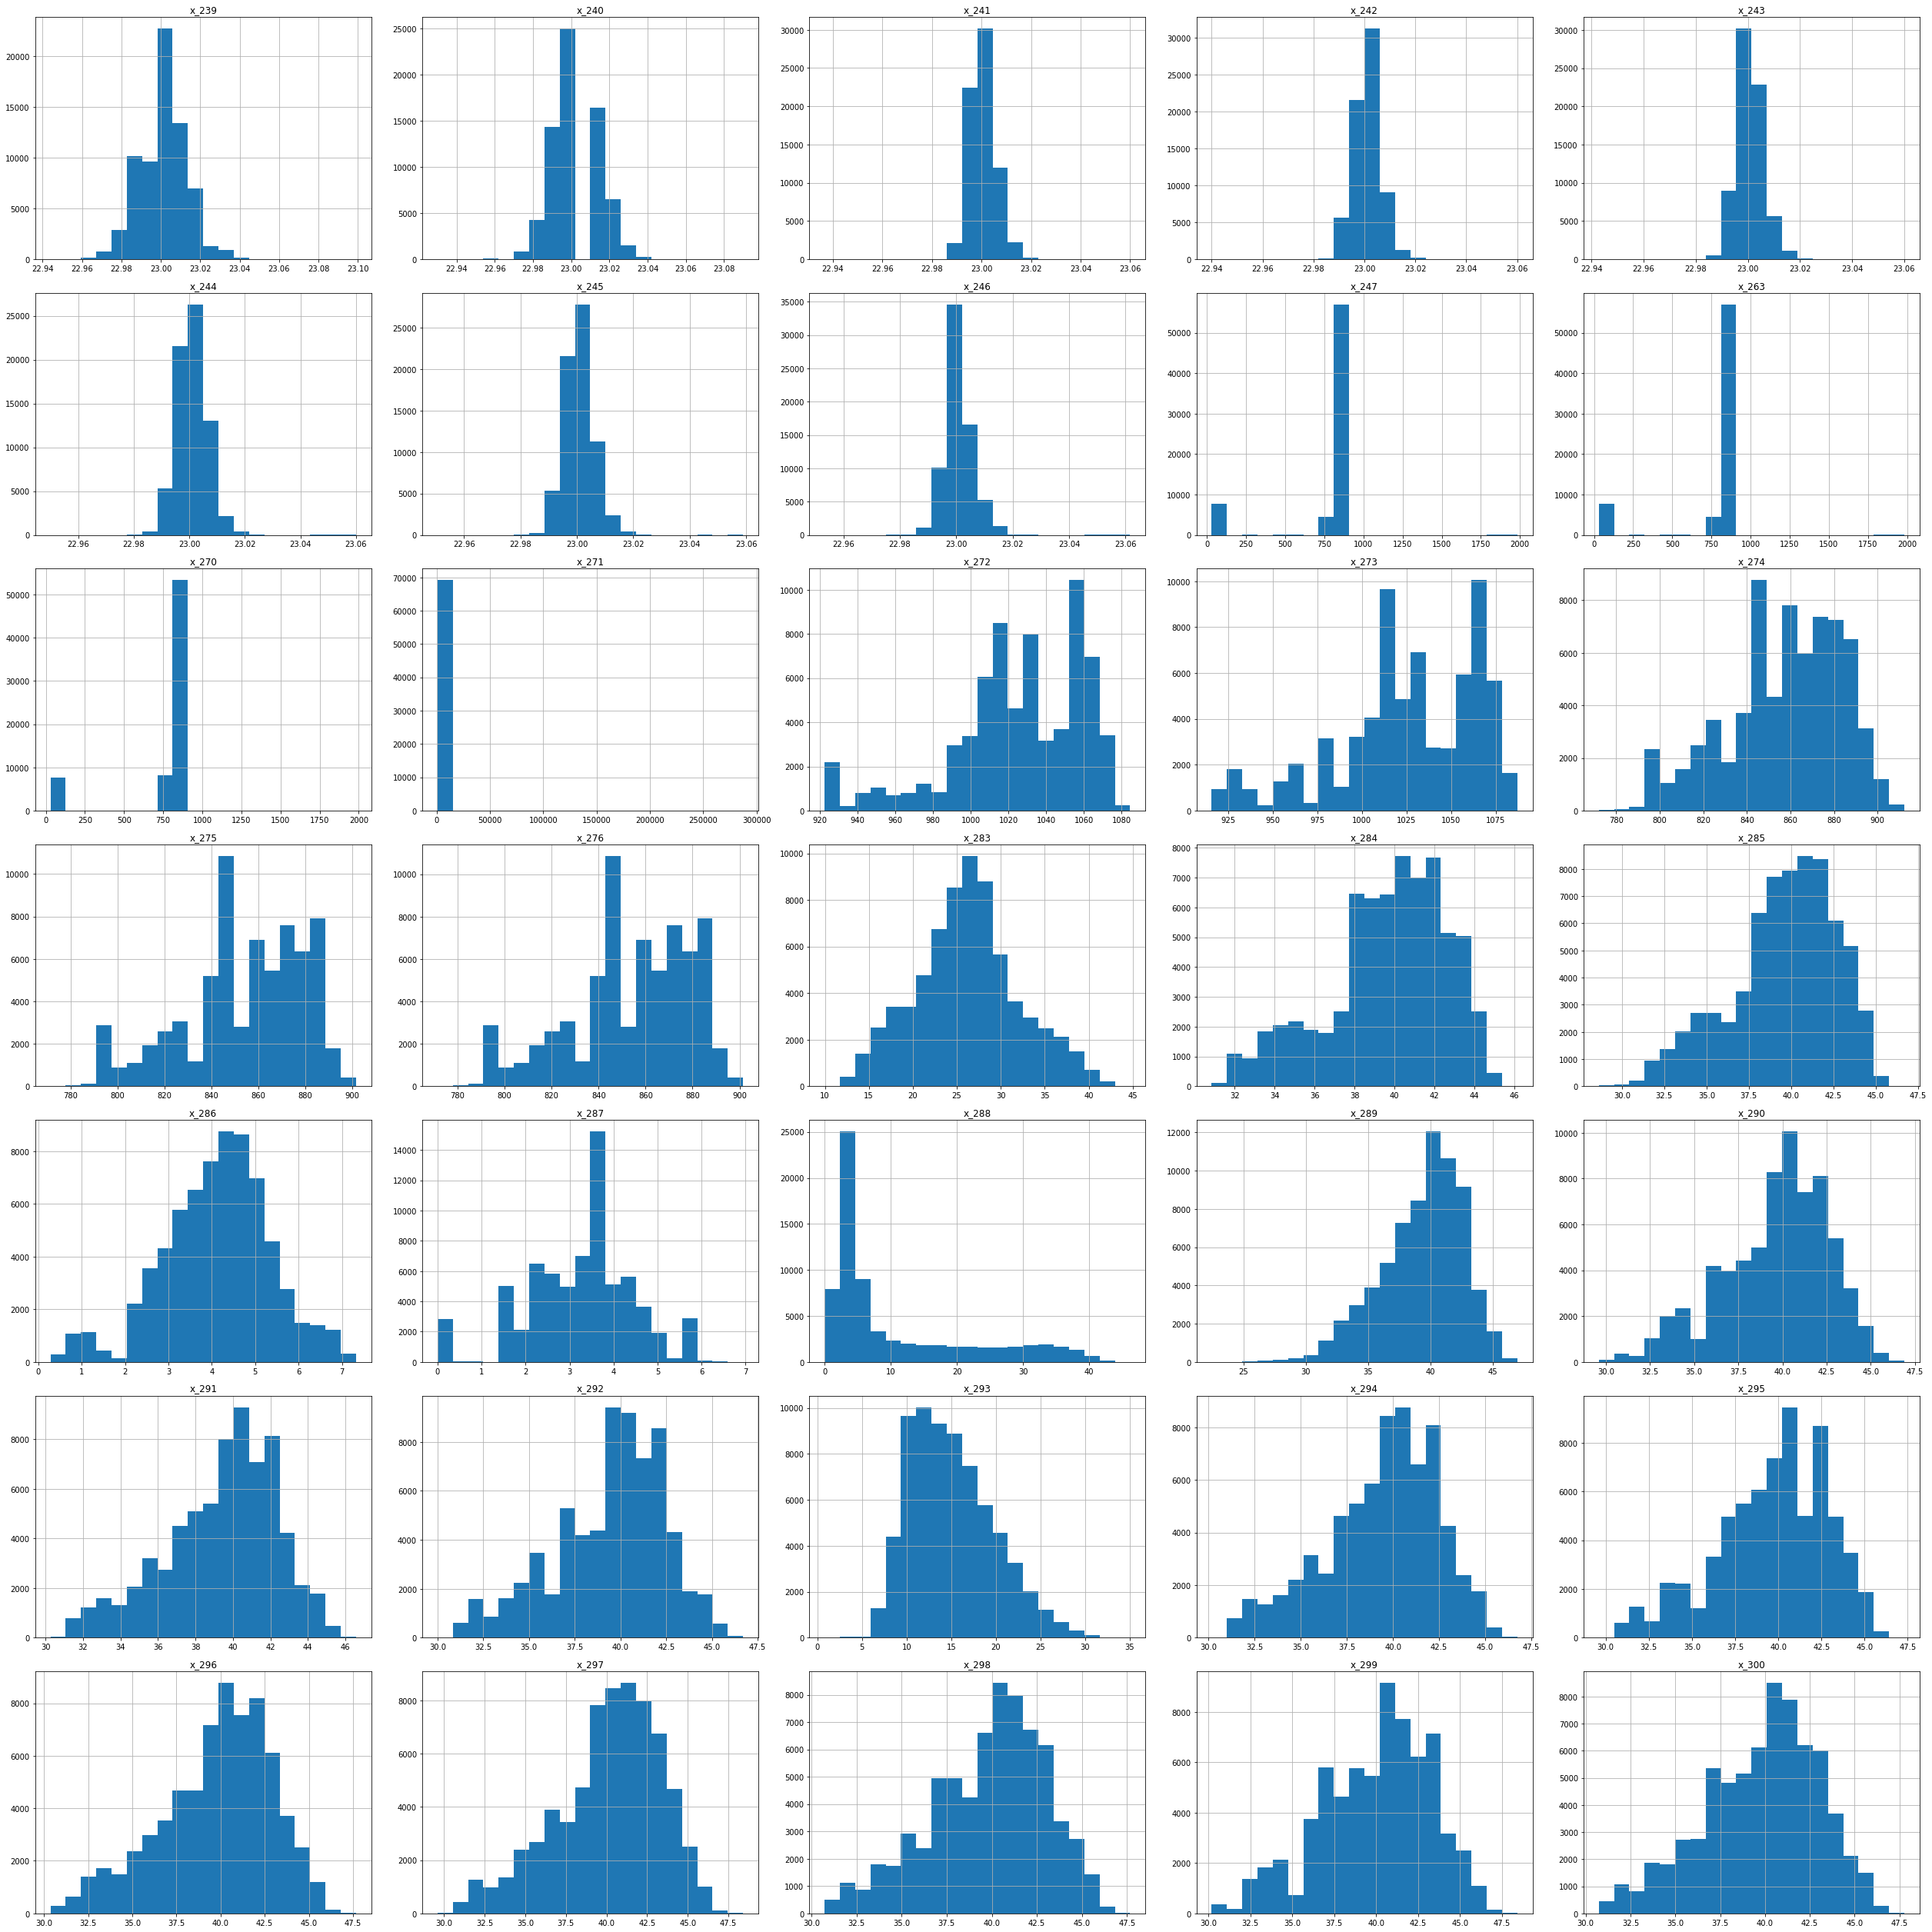

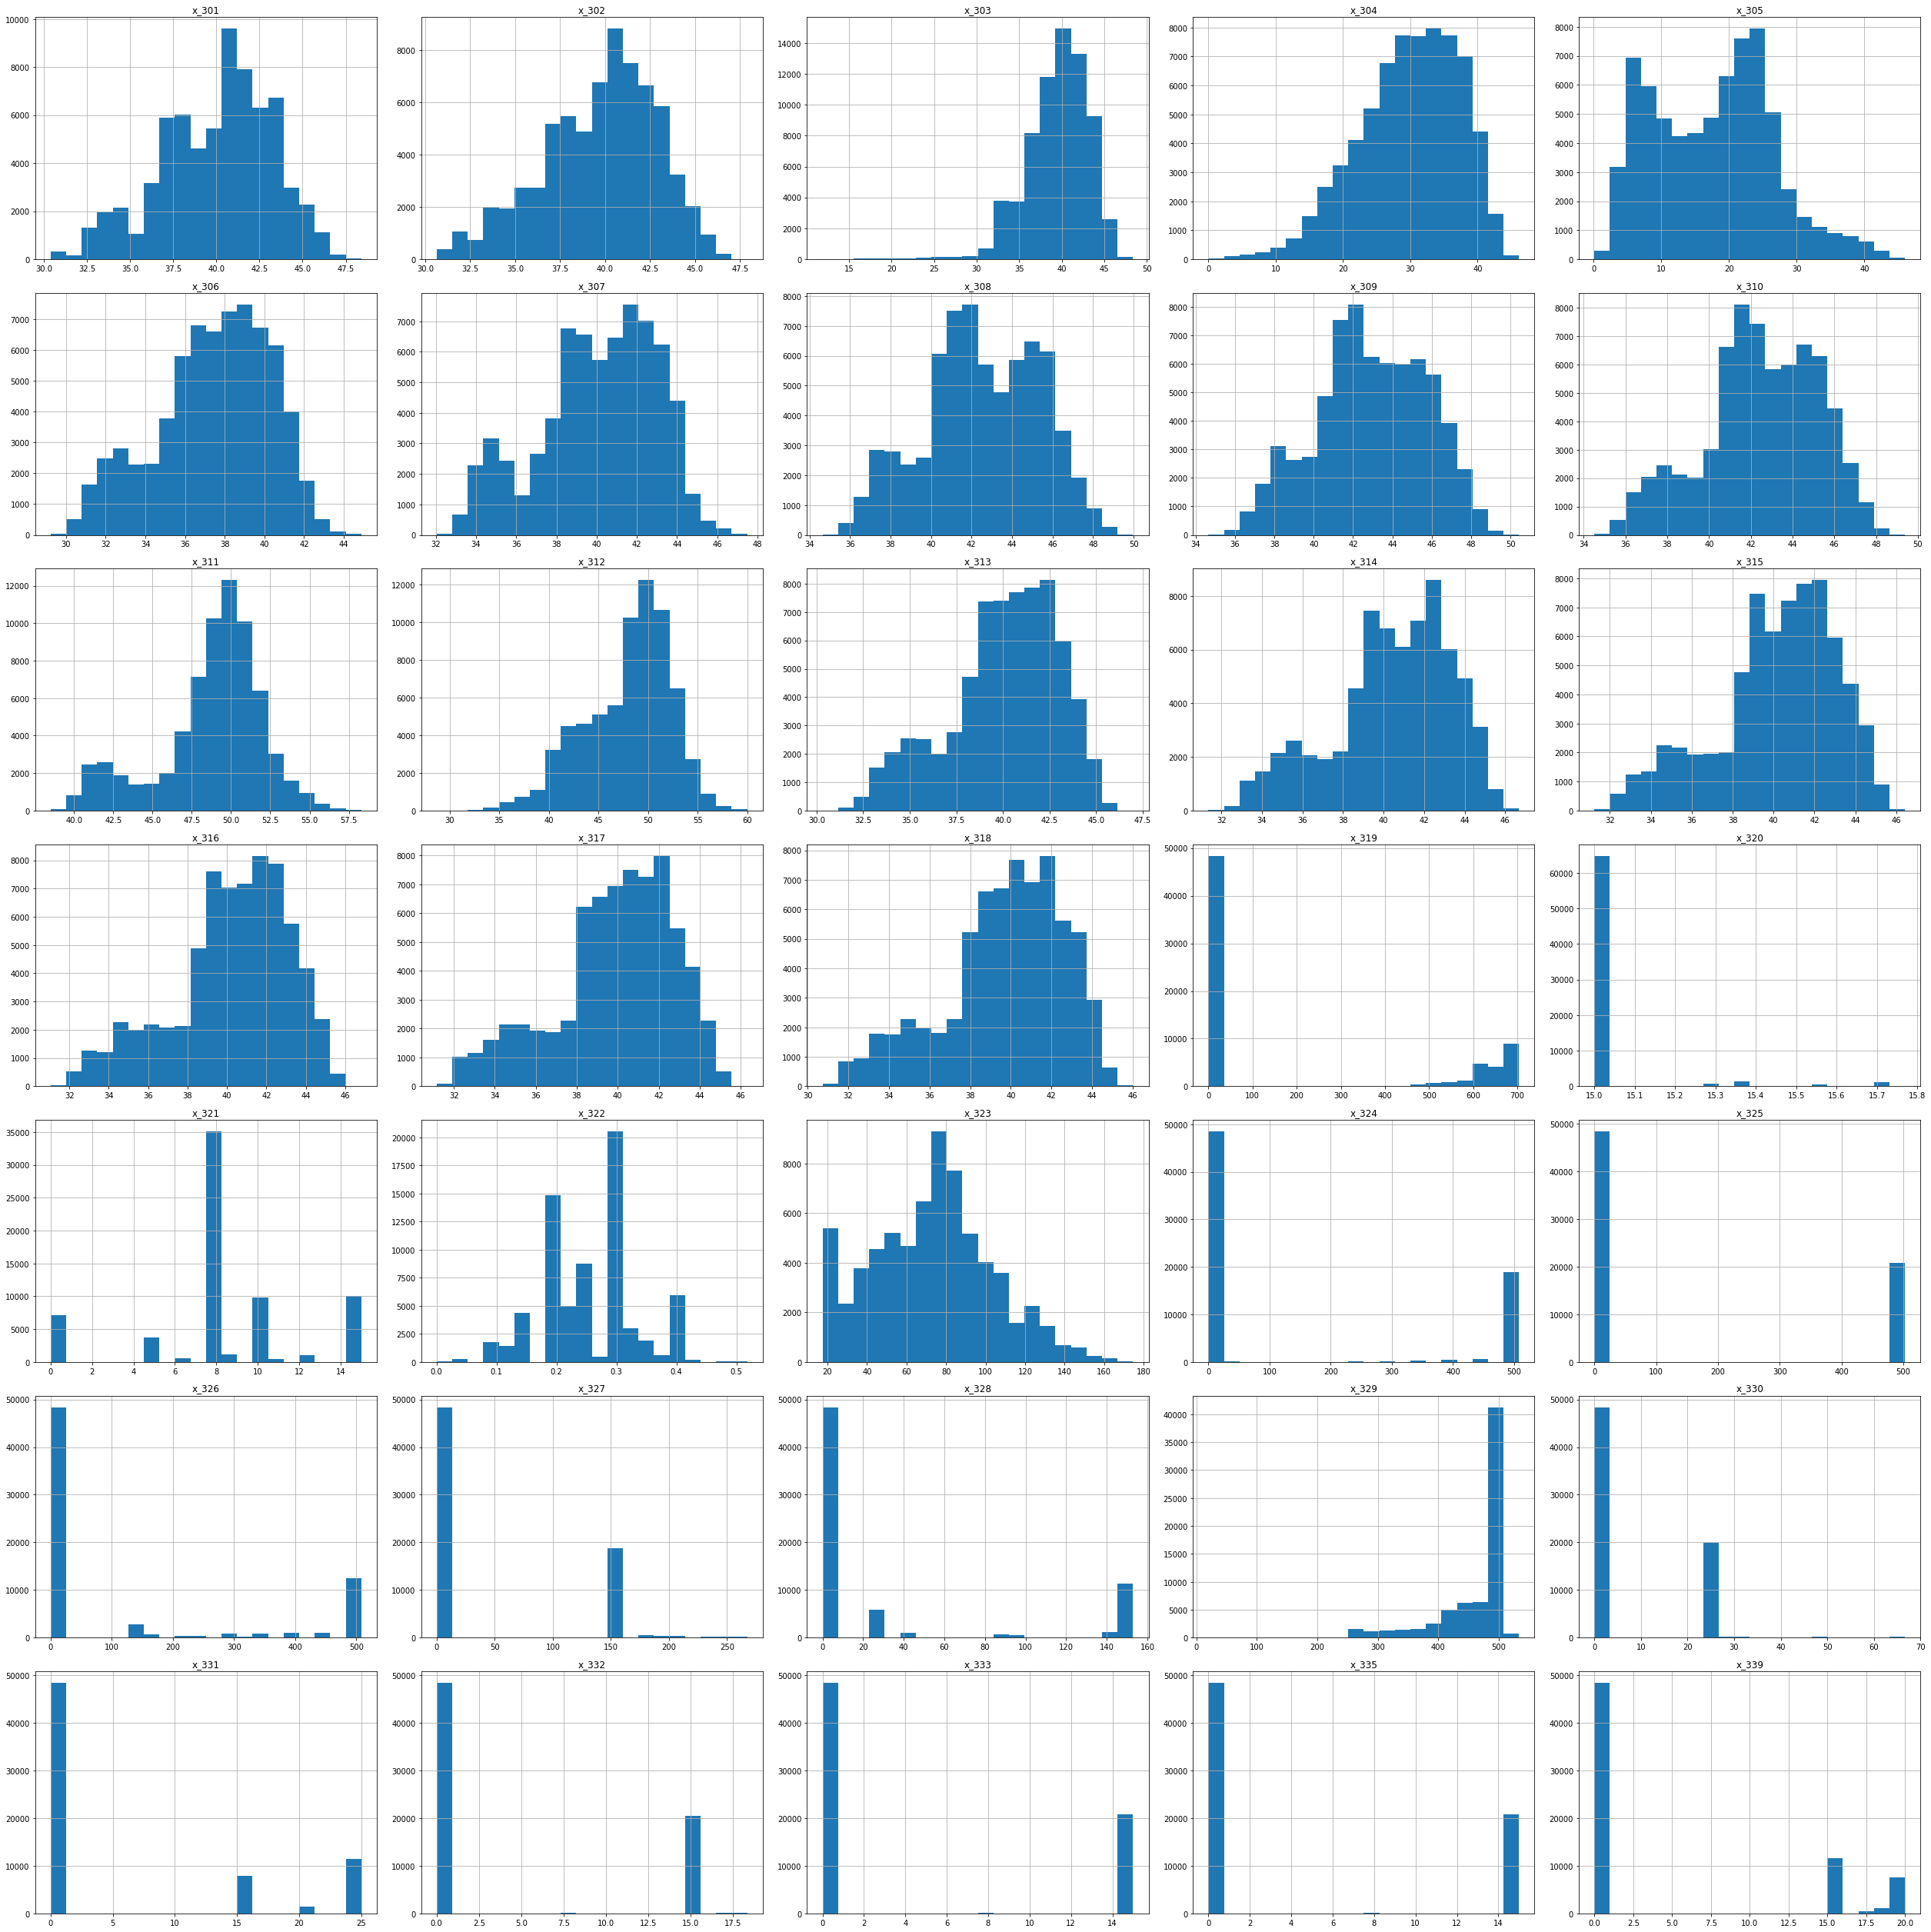

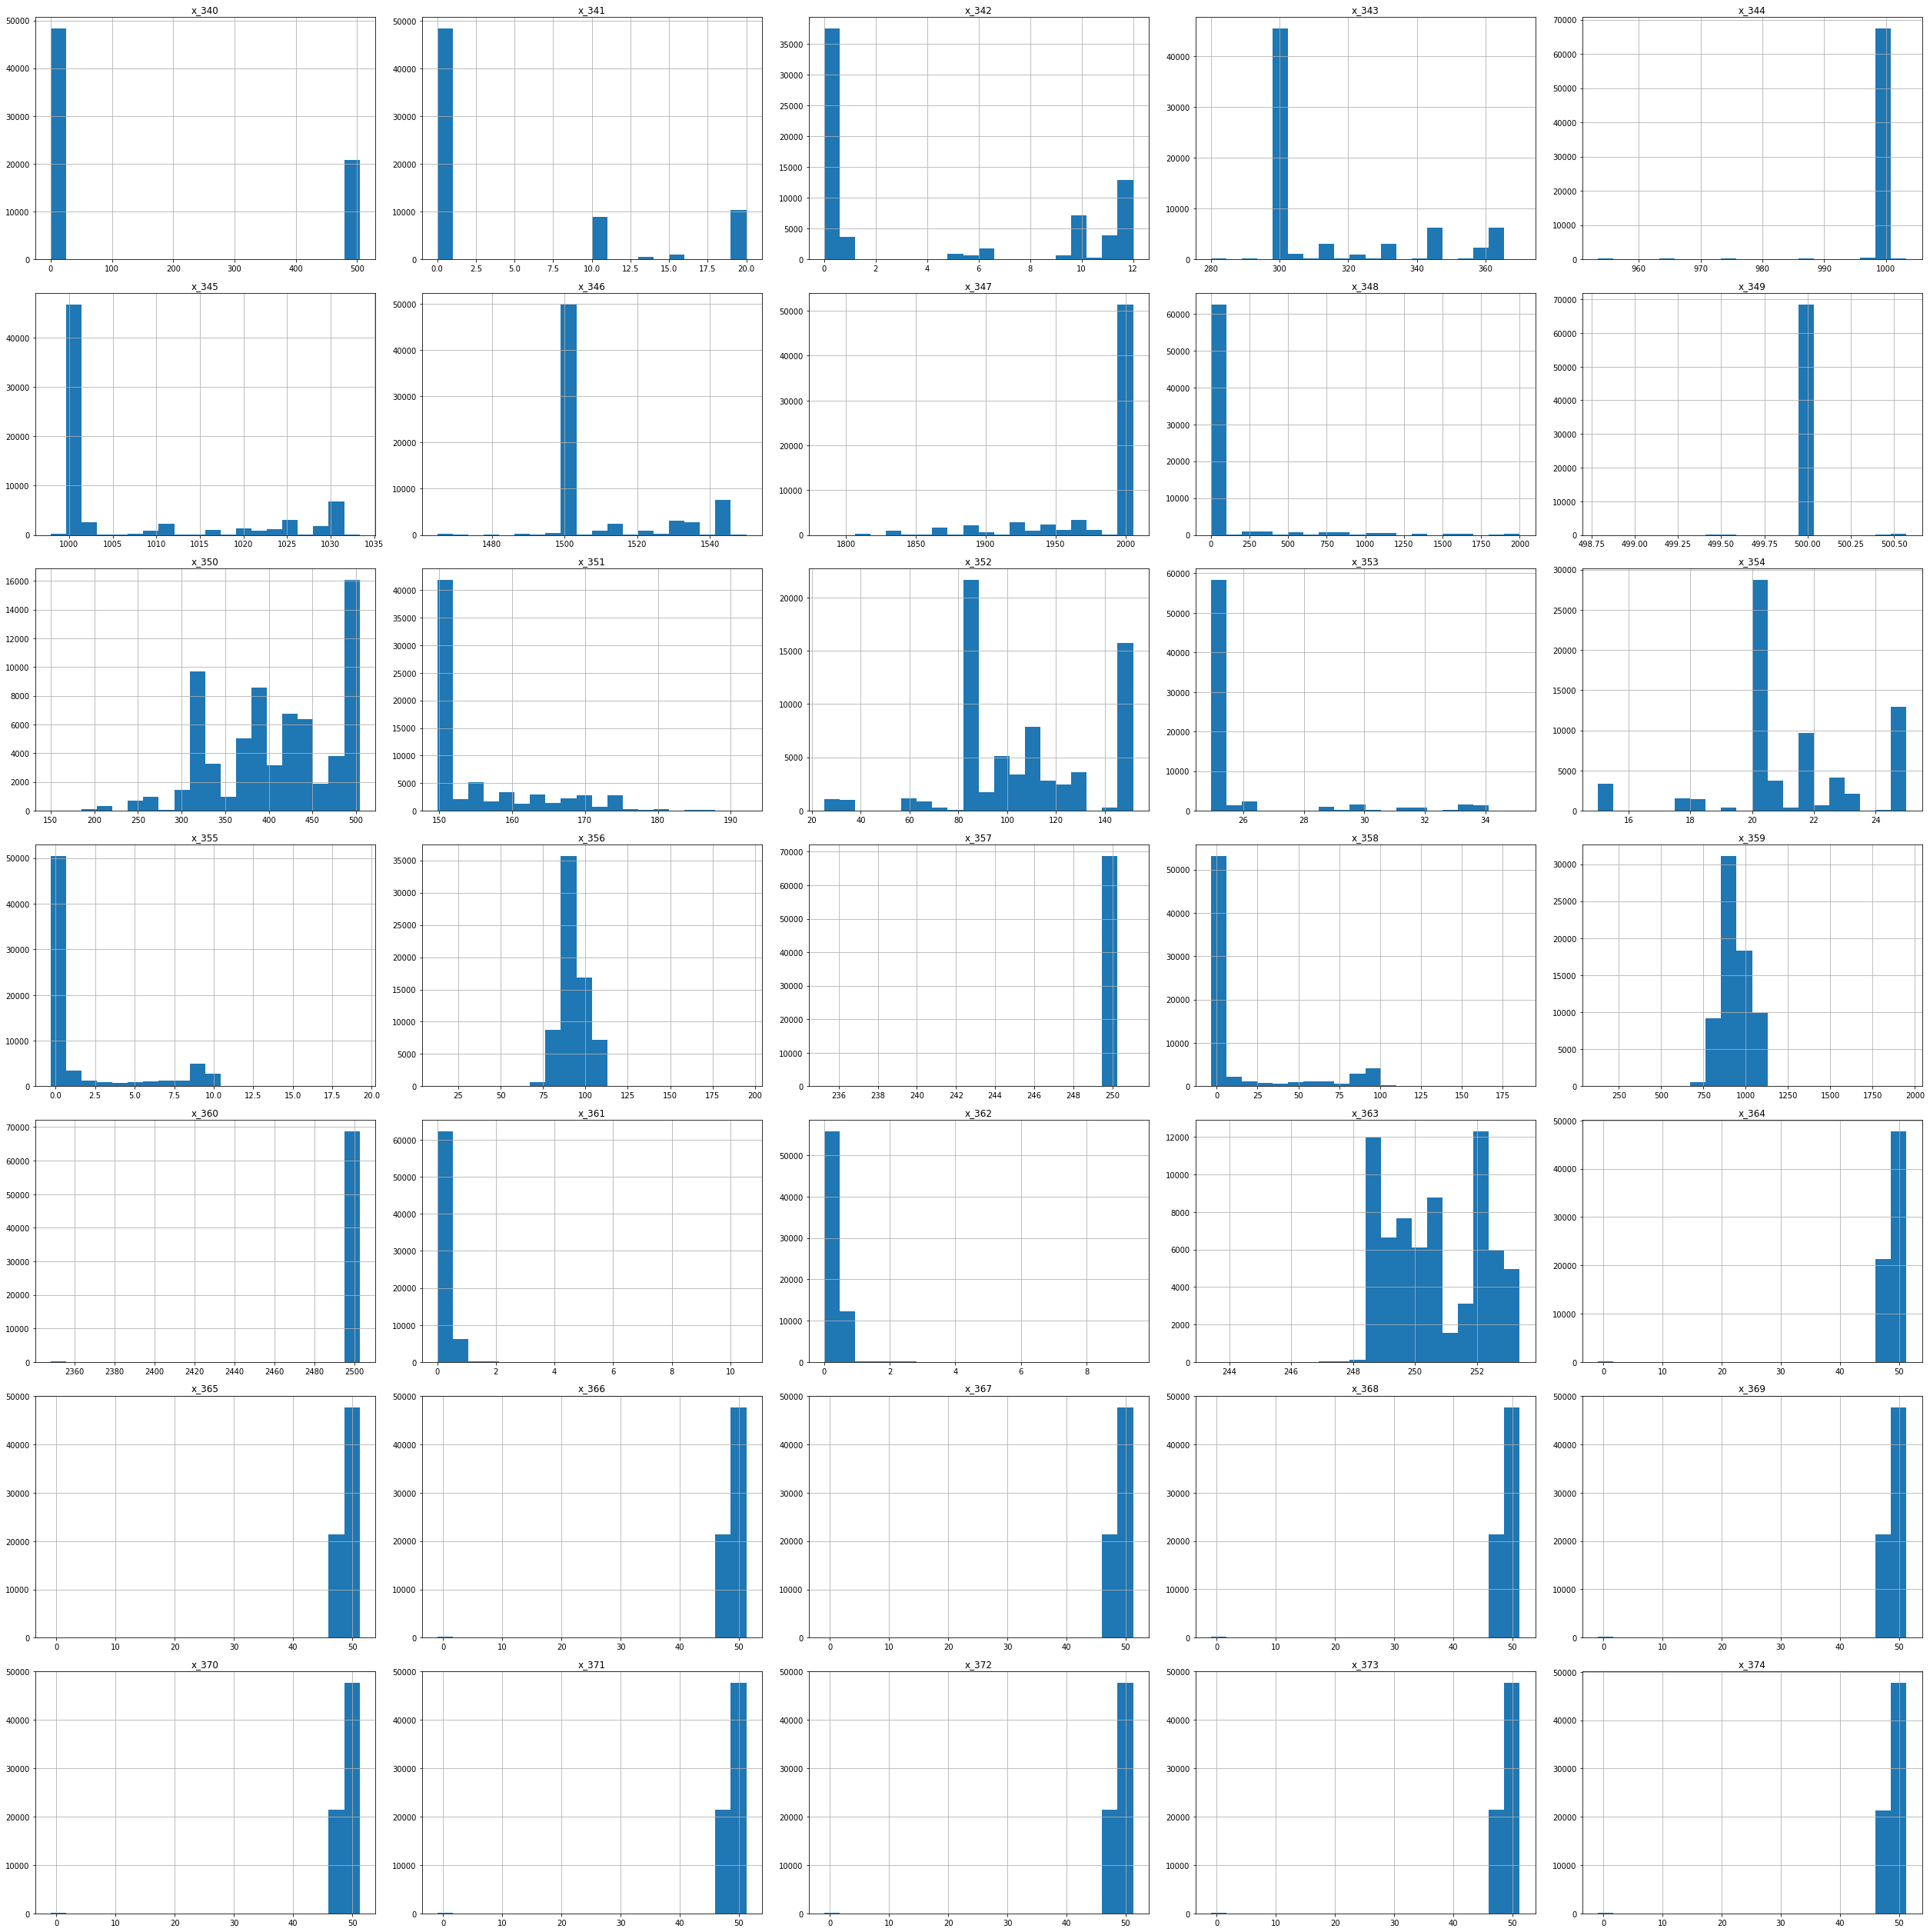

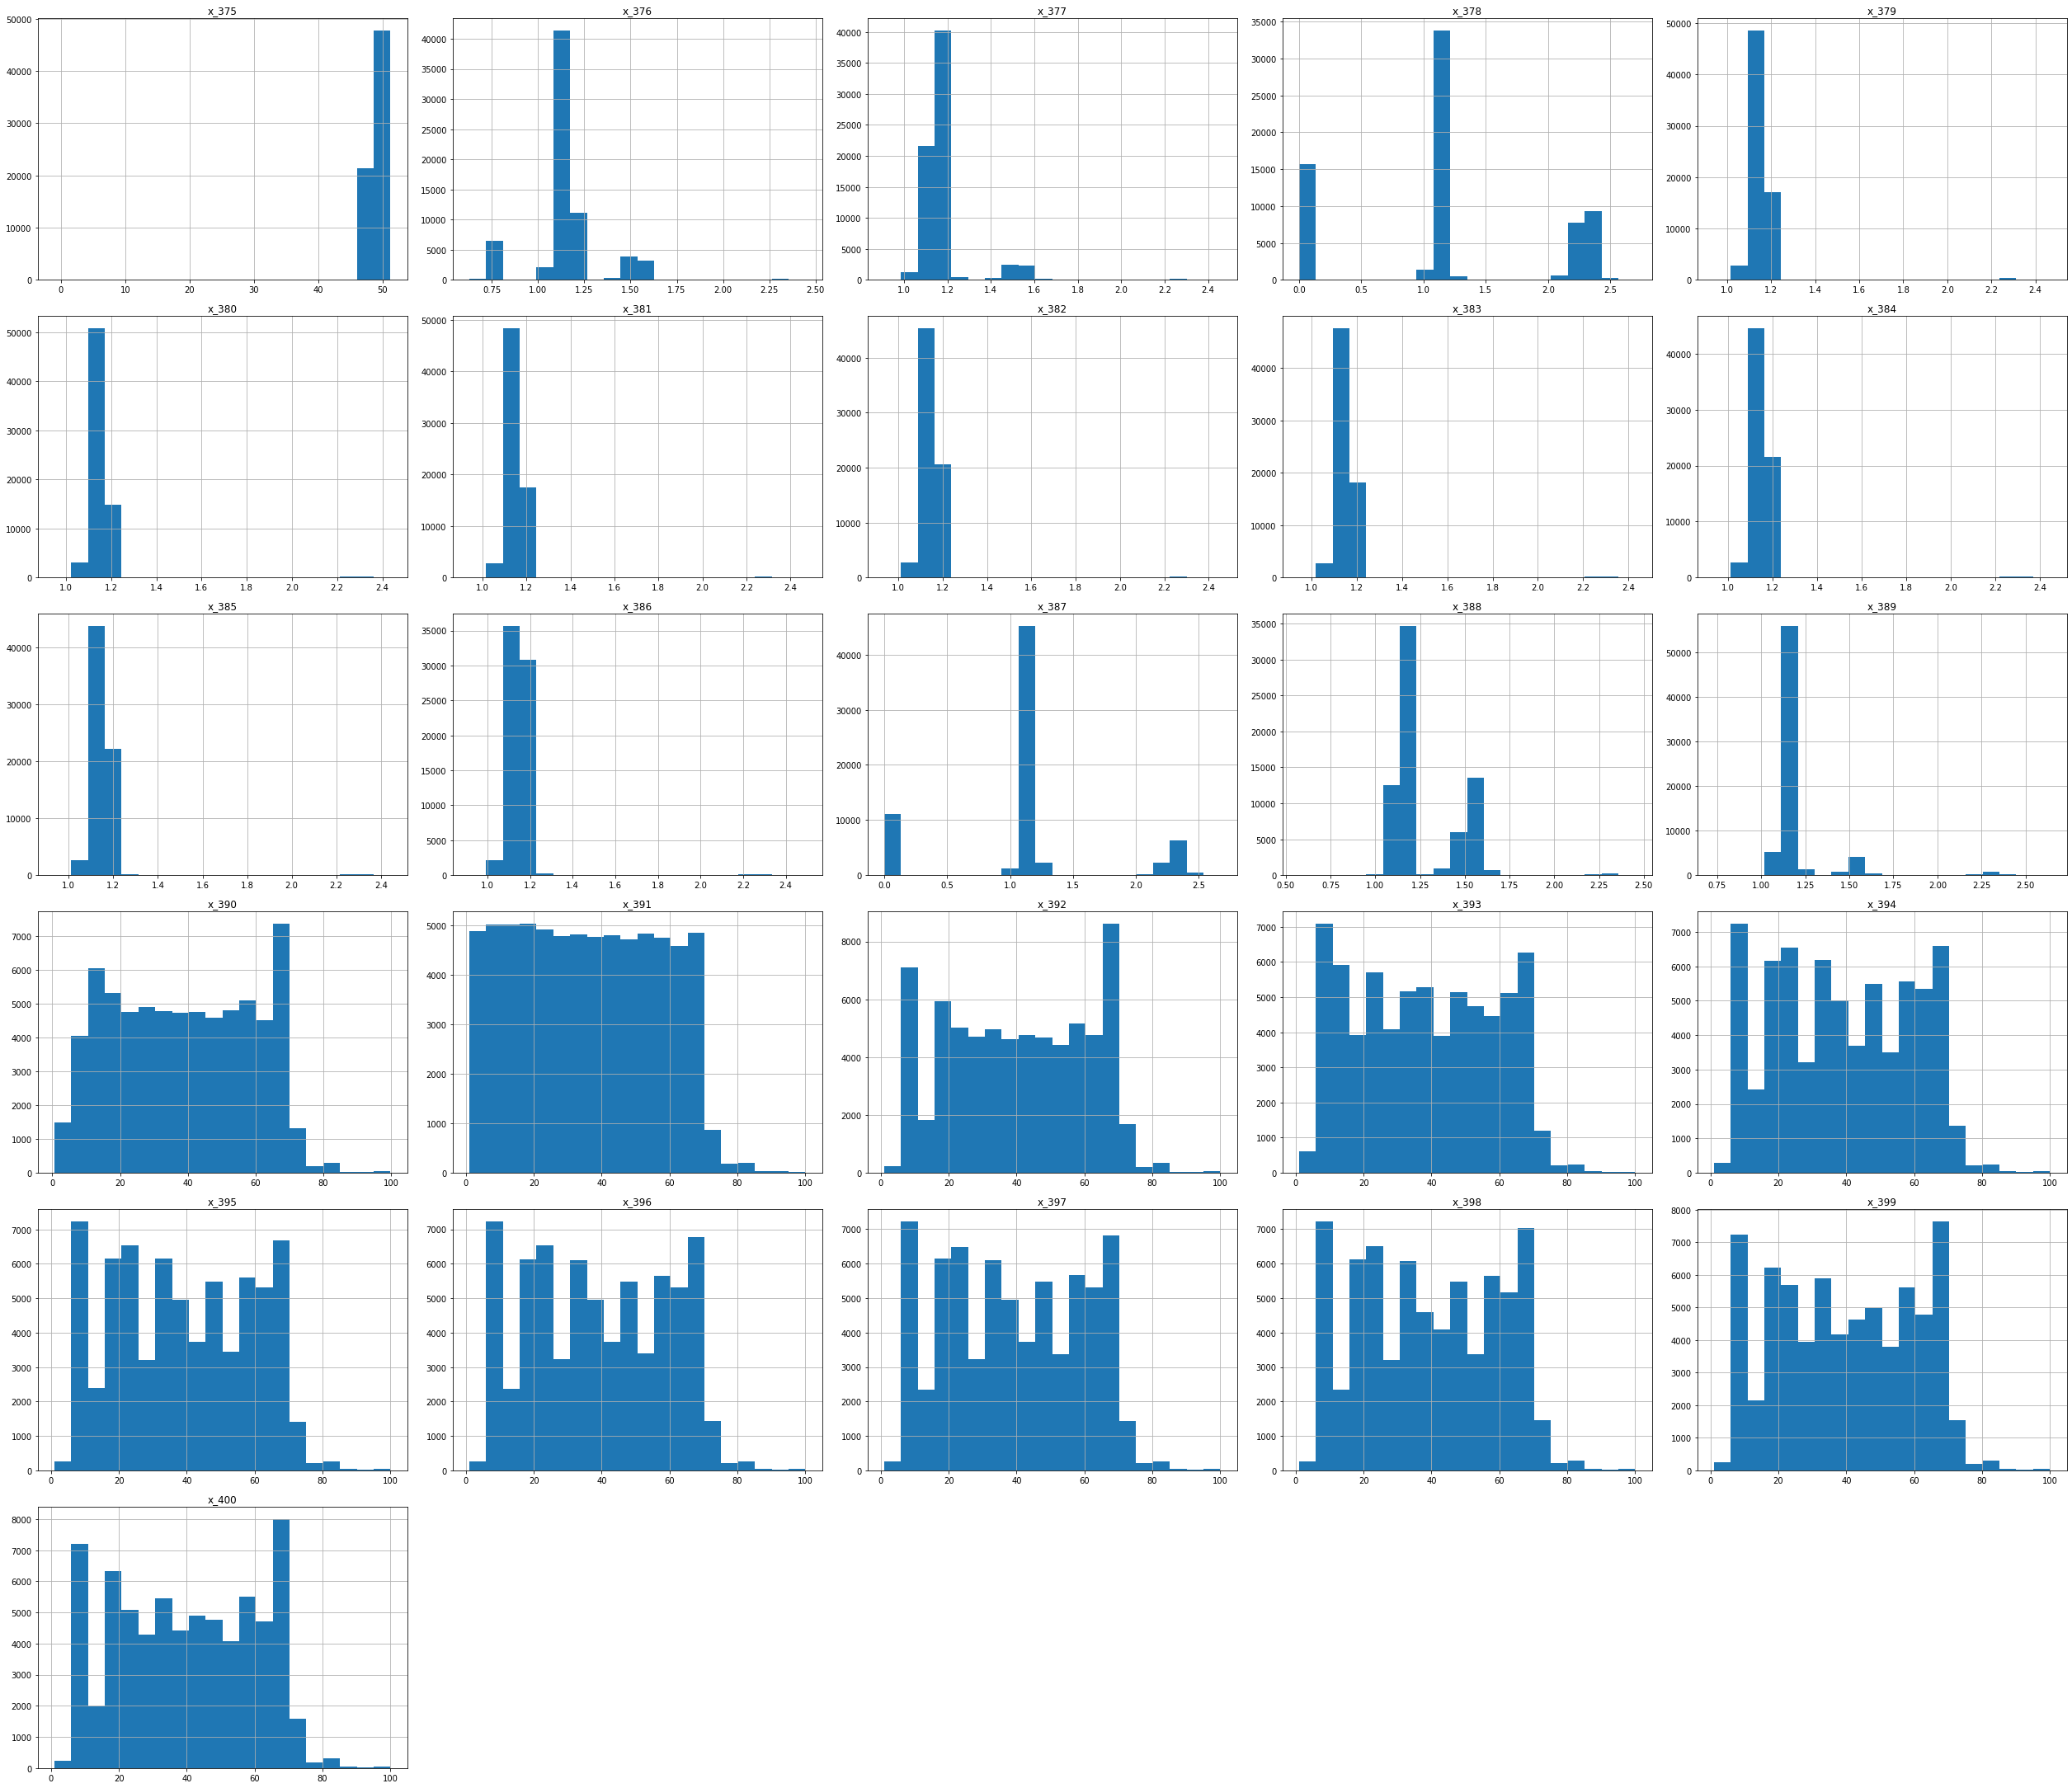

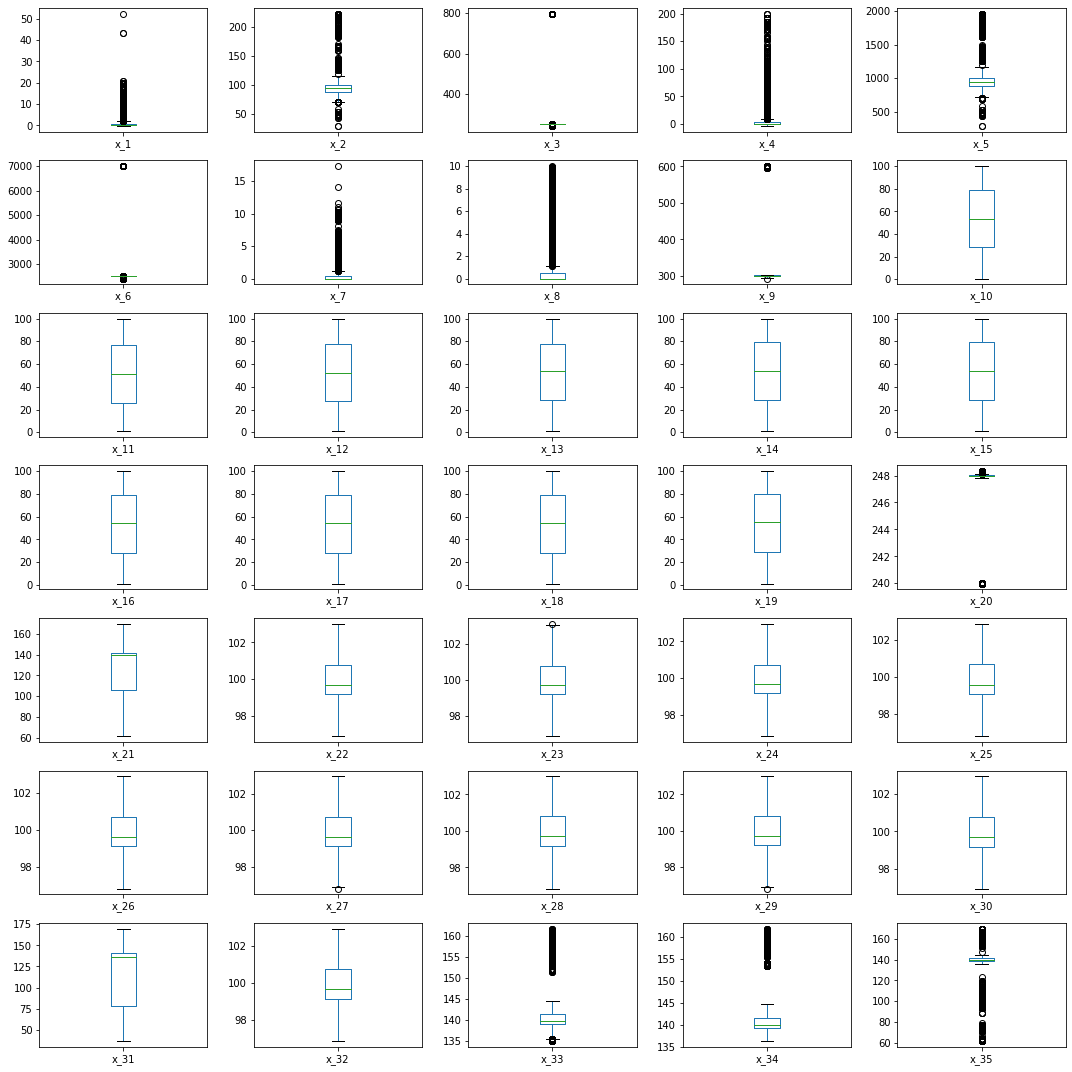

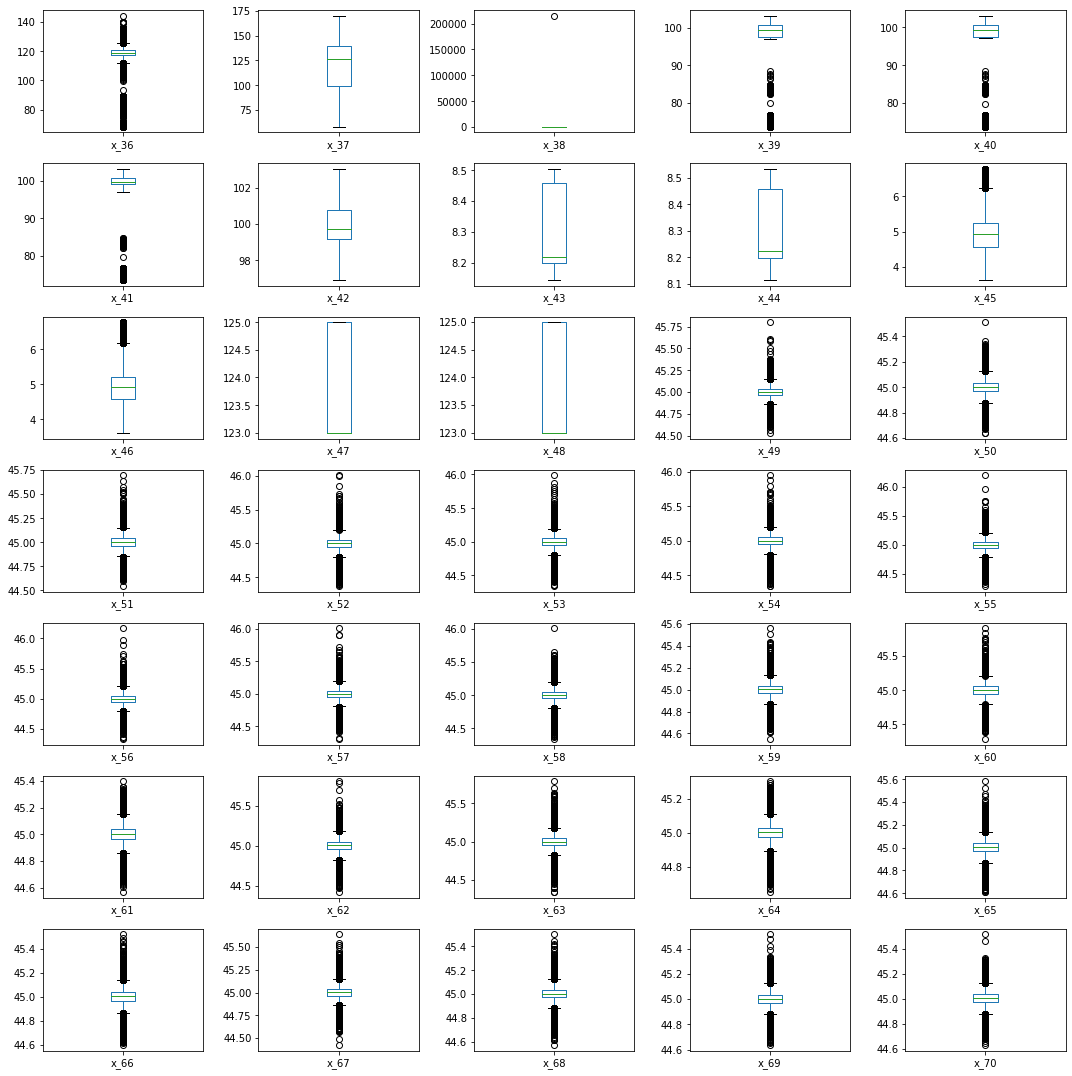

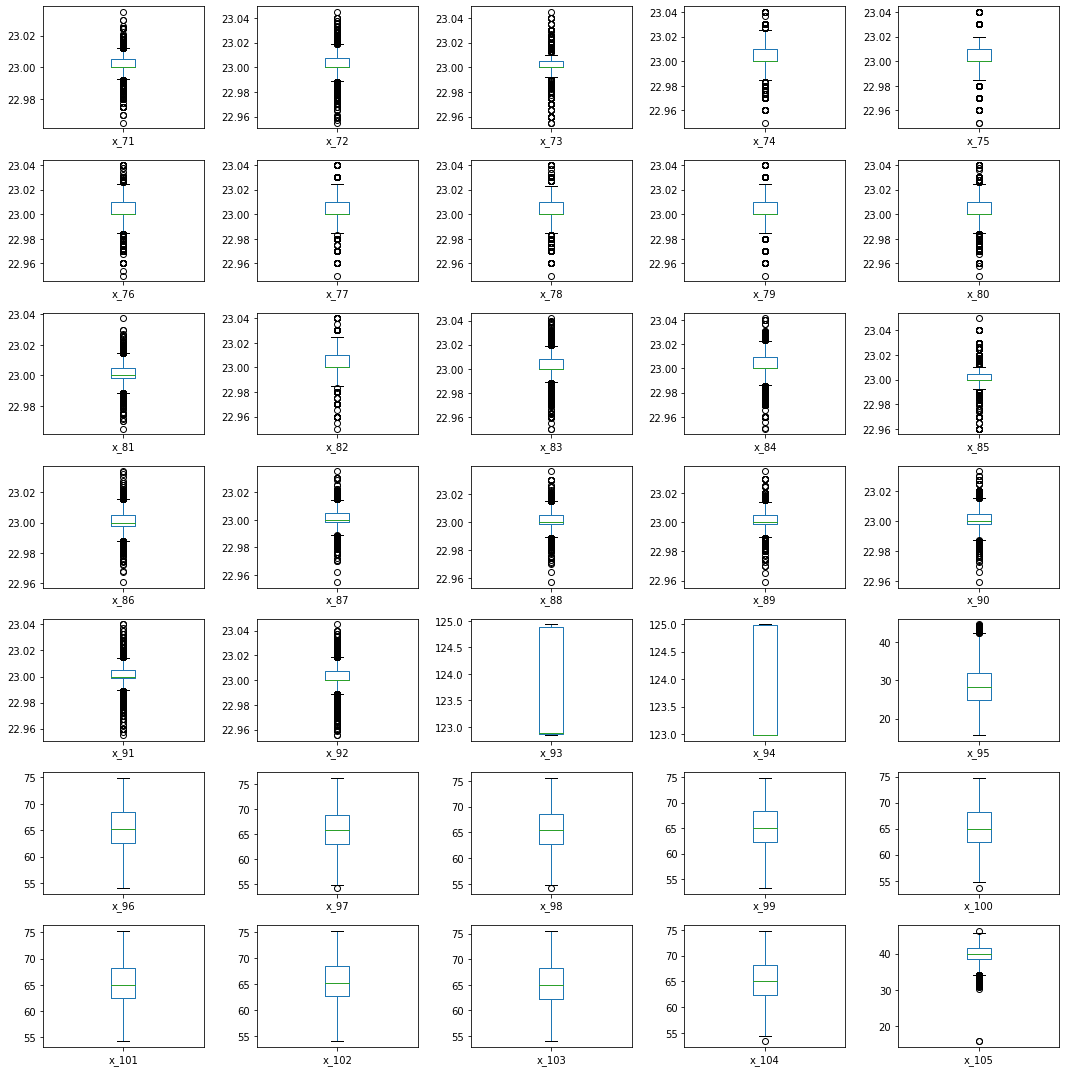

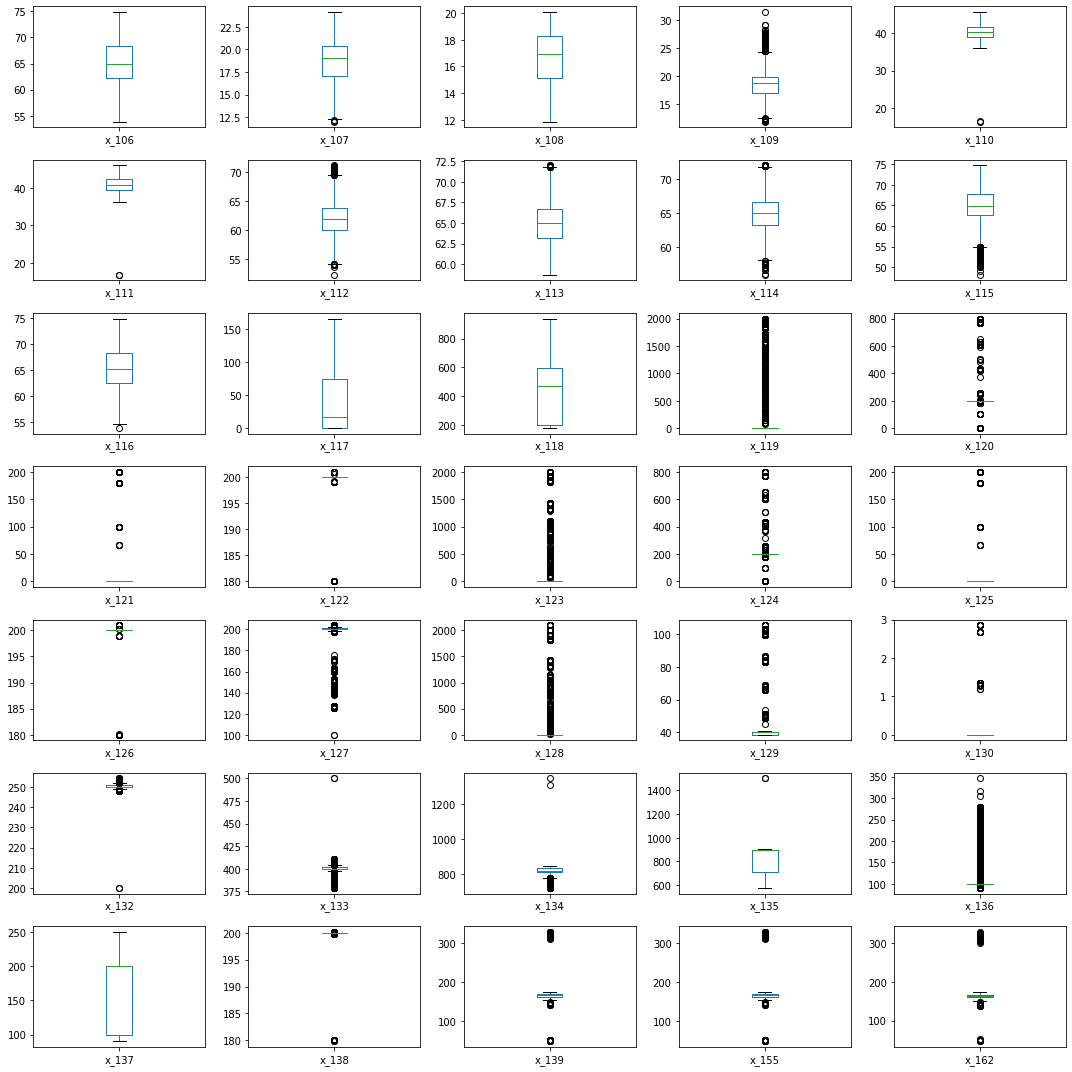

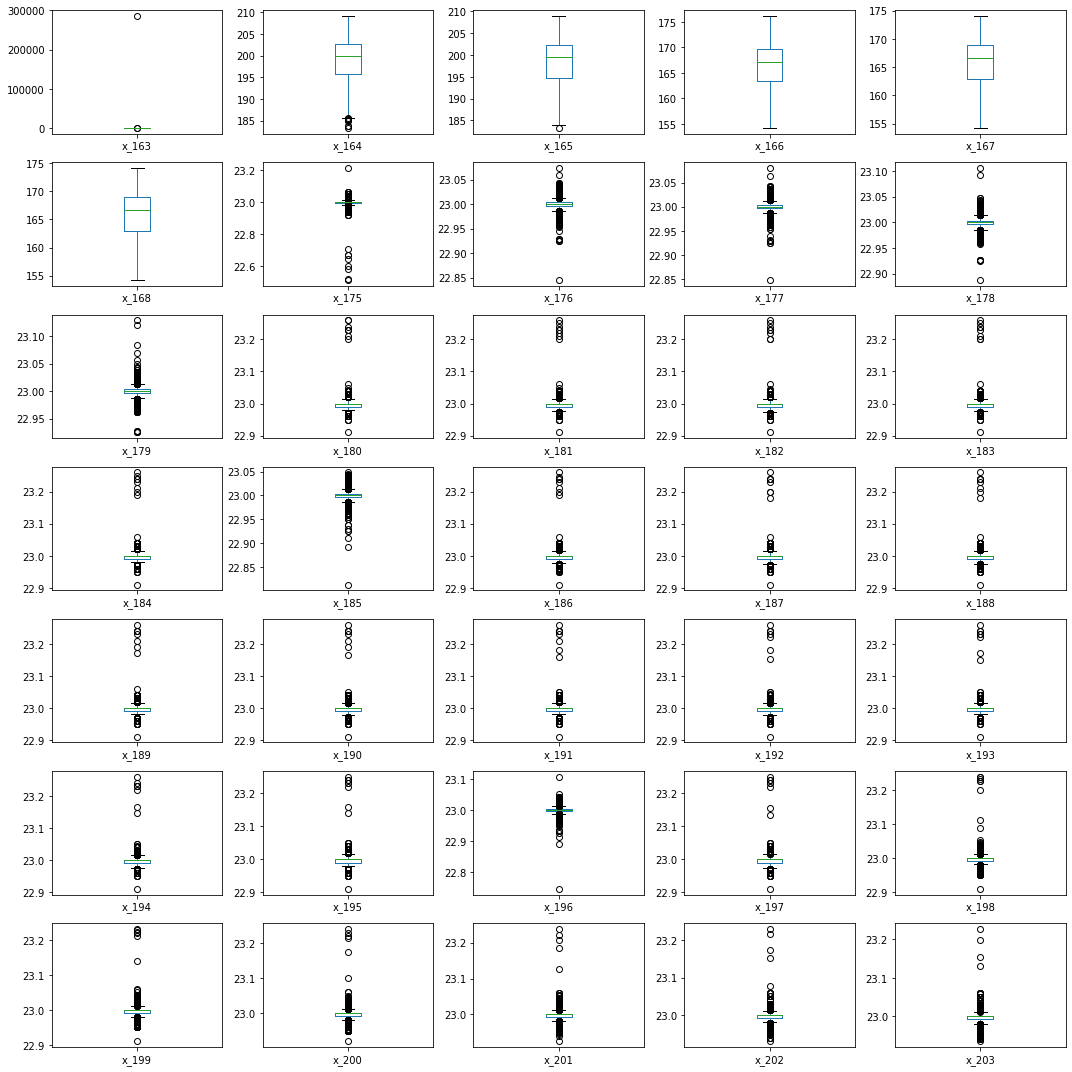

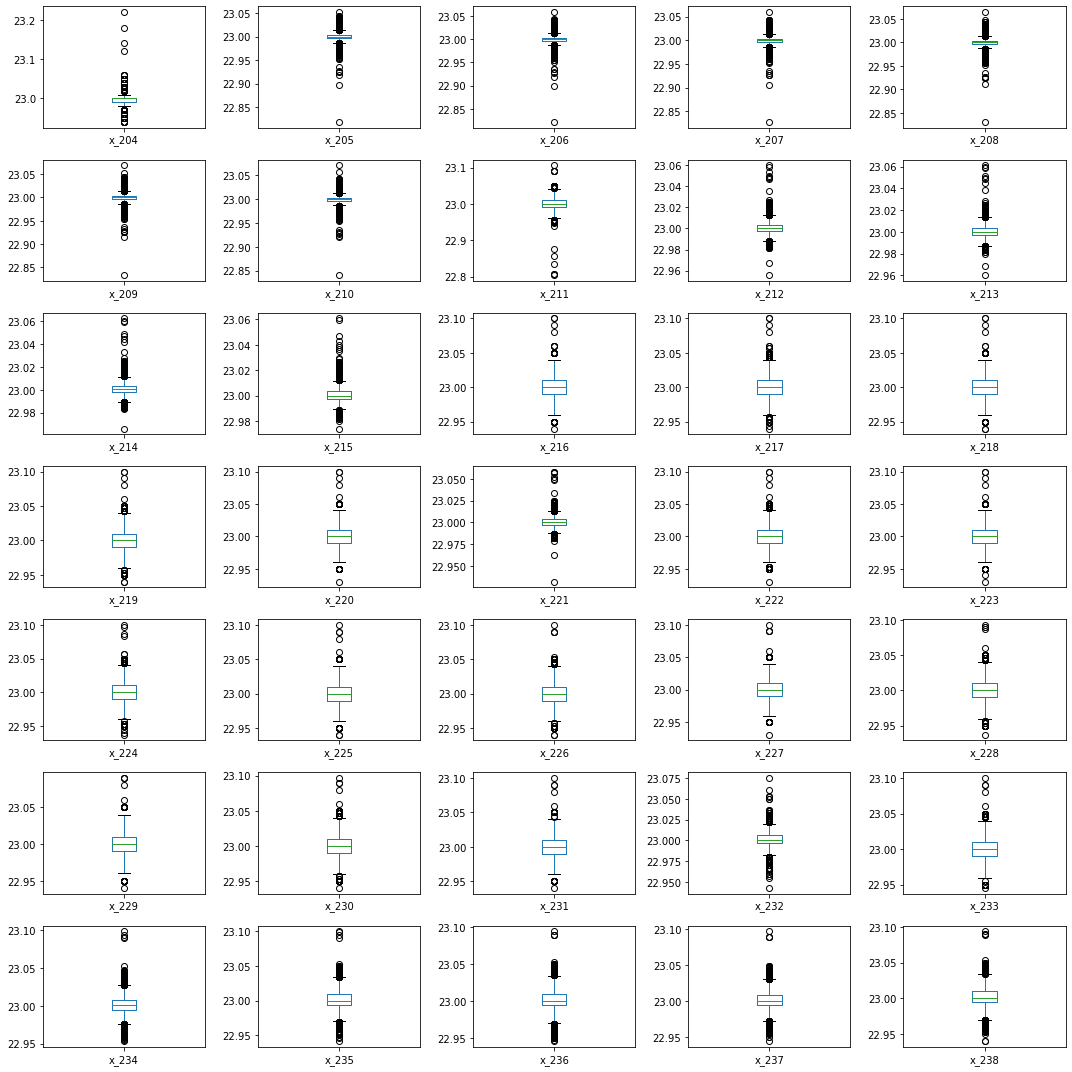

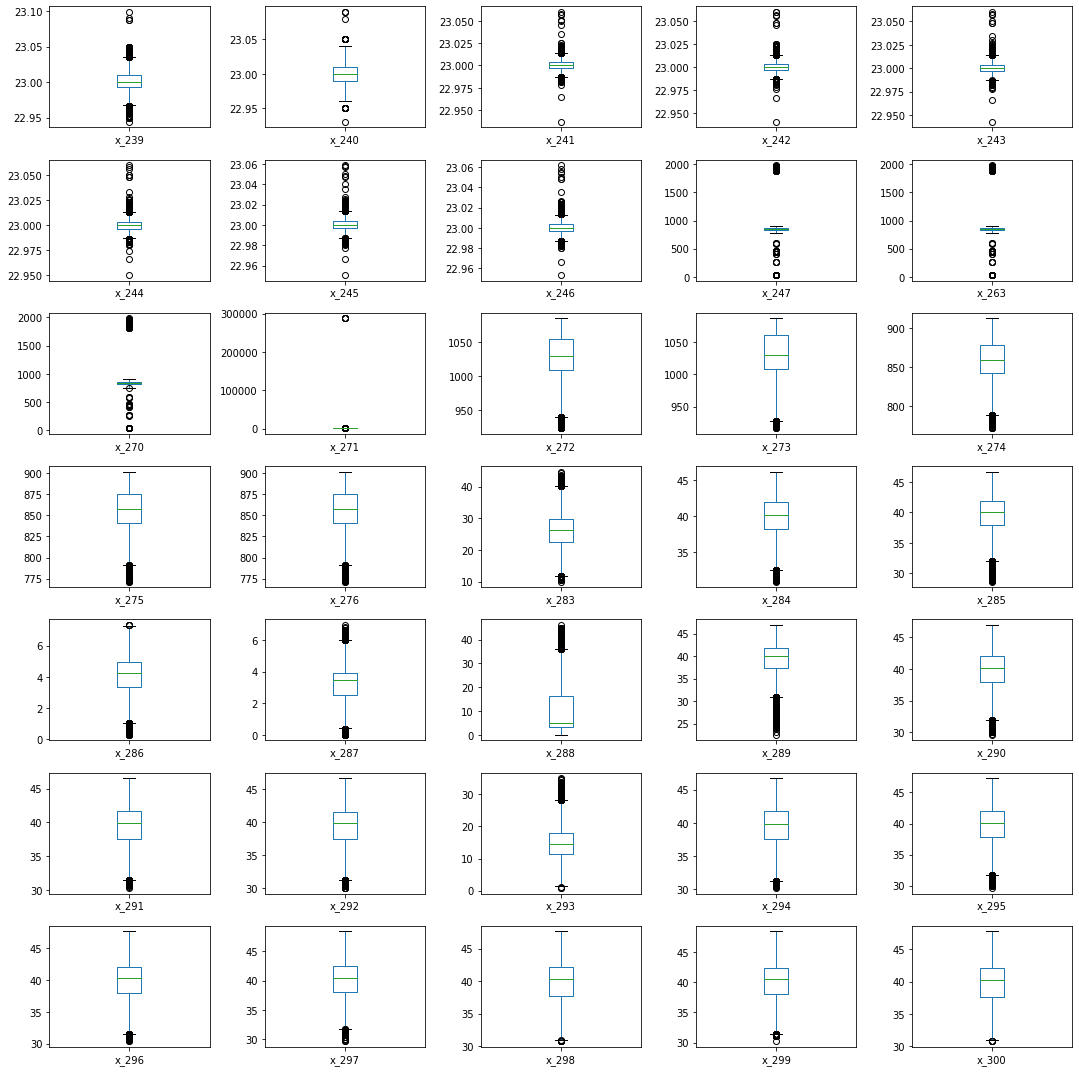

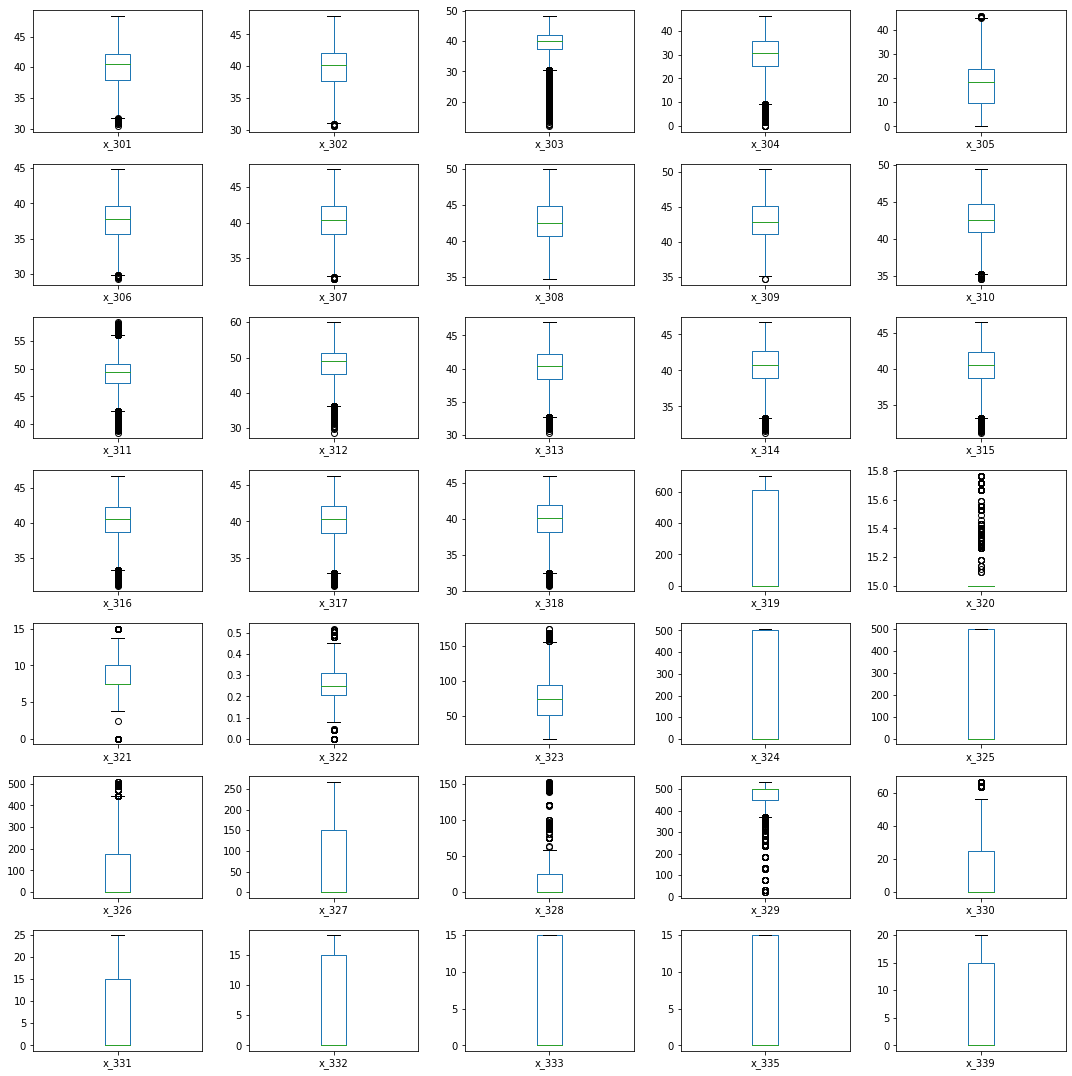

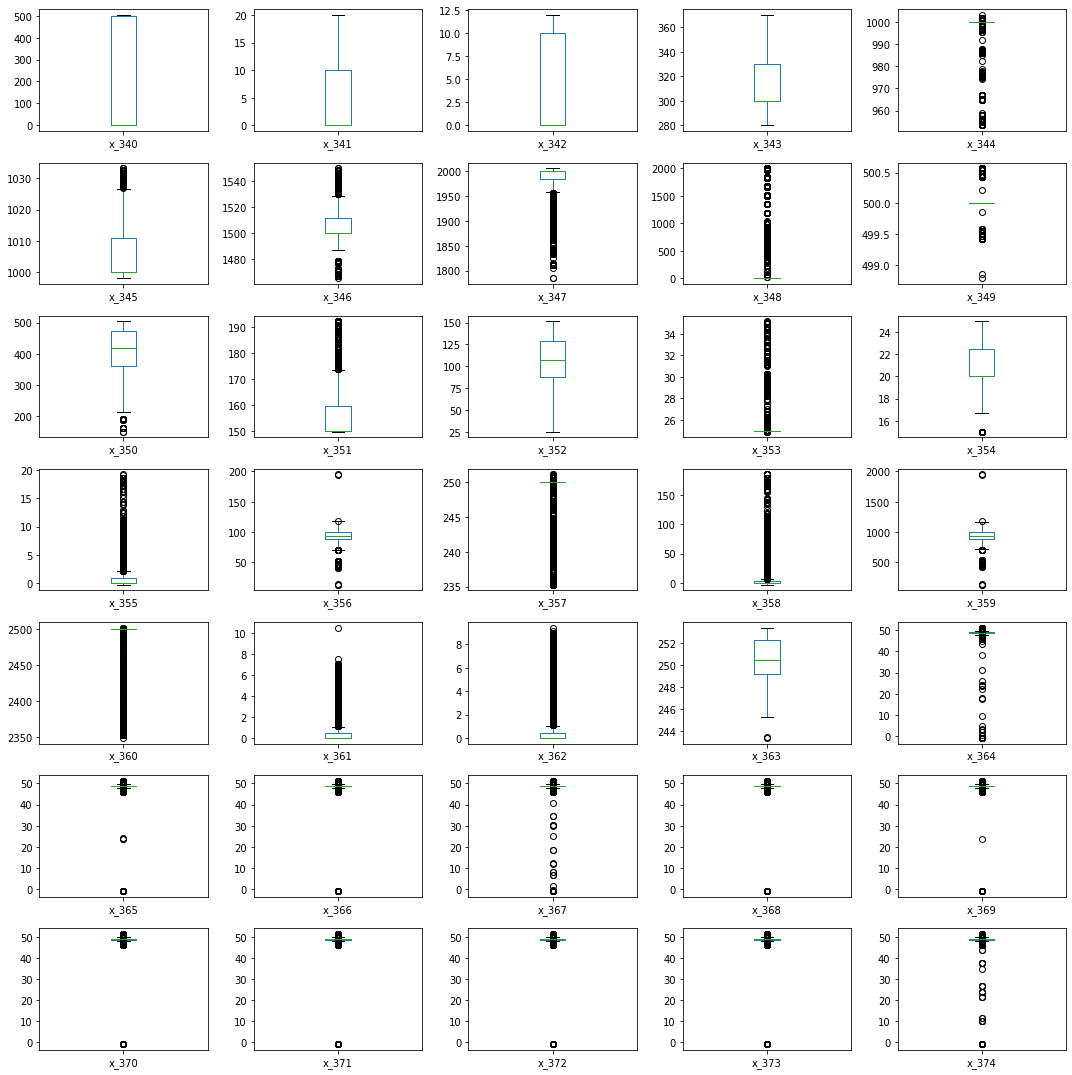

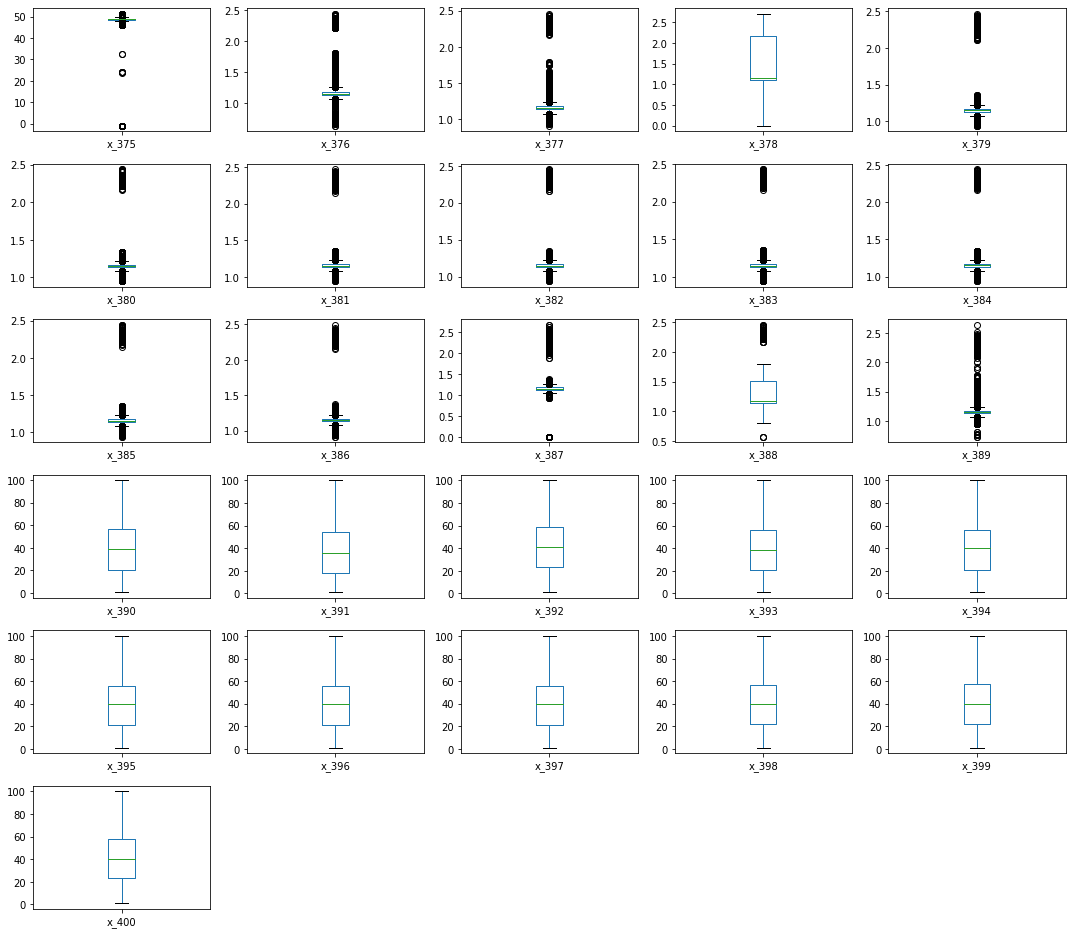

In [12]:
# 2.3. 데이터 분포 살펴보기
# 경로 생성
os.makedirs('./histogram', exist_ok=True)
os.makedirs('./boxplot', exist_ok=True)

# 변수별 히스토그램
for i in range(0,10):
    temp_df = x_drop_all.iloc[:,i*35:35*(i+1)]
    temp_df.hist(figsize=(35,35), layout=(7,5), bins=20)
    plt.tight_layout()
    plt.savefig(f"histogram/hist_{i}.png")

# 변수별 박스플랏
for i in range(0,10):
    temp_df = x_drop_all.iloc[:,i*35:35*(i+1)]
    temp_df.plot(kind="box",subplots=True,layout=(7,5),figsize=(15,15))
    plt.tight_layout()
    plt.savefig(f"boxplot/boxplot_{i}.png")

In [13]:
# 2.4. 아웃라이어 제거
# 이상치 제거 (1) : IQR 활용
def get_outlier_right_skewed(df=None, column=None, weight=1.0):
    quantile_1 = np.percentile(df[column].values, 5)
    quantile_2 = np.percentile(df[column].values, 95)
  
    IQR = quantile_2 - quantile_1
    IQR_weight = IQR * weight
  
    highest = quantile_2 + IQR_weight
  
    outlier_idx = df[column][(df[column] > highest)].index
    return outlier_idx

def get_outlier_no_skewed(df=None, column=None, weight=1.0):
    quantile_1 = np.percentile(df[column].values, 2.5)
    quantile_2 = np.percentile(df[column].values, 97.5)
  
    IQR = quantile_2 - quantile_1
    IQR_weight = IQR * weight
  
    lowest = quantile_1 - IQR_weight
    highest = quantile_2 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

def get_outlier_left_skewed(df=None, column=None, weight=1.0):
    quantile_1 = np.percentile(df[column].values, 5)
    quantile_2 = np.percentile(df[column].values, 95)
  
    IQR = quantile_2 - quantile_1
    IQR_weight = IQR * weight
  
    lowest = quantile_1 - IQR_weight
  
    outlier_idx = df[column][(df[column] < lowest)].index
    return outlier_idx 
 
# 이상치 제거 (2) : Z-score : 3-sigma 밖의 값 제거
def outliers_z_score(df=None, column=None, threshold=3):
    mean = np.mean(df[column].values)
    std = np.std(df[column].values)
    
    z_scores = np.array([(y-mean)/std for y in df[column].values])
    
    outlier_idx = df[column][(np.abs(z_scores)>threshold)].index
    return outlier_idx

In [14]:
# (1) IQR 활용 Version
right_skewed_list = list(x_drop_all.columns[x_drop_all.skew()>10])
no_skewed_list = list(x_drop_all.columns[np.abs(x_drop_all.skew())<10])
left_skewed_list = list(x_drop_all.columns[x_drop_all.skew()<-10])

outlier_idxes = []

# right_skewed
outlier_idxes_right=[]
for i, col_name in enumerate(right_skewed_list):
    outlier_idx = get_outlier_right_skewed(df=x_drop_all, column=col_name, weight=25)
    print(col_name, '--> 제거된 Outlier 수:',len(outlier_idx))
    outlier_idxes_right.extend(list(outlier_idx))
    #print('\n')
outlier_idxes_right = list(set(outlier_idxes_right))
print('right_skewed Outlier 수 -->', len(outlier_idxes_right))
print('\n')


#no skewed
outlier_idxes_no_skew=[]
for i, col_name in enumerate(no_skewed_list):
    outlier_idx = get_outlier_no_skewed(df=x_drop_all, column=col_name, weight=2)
    print(col_name, '--> 제거된 Outlier 수',len(outlier_idx))
    outlier_idxes_no_skew.extend(list(outlier_idx))
    #print('\n')
outlier_idxes_no_skew = list(set(outlier_idxes_no_skew))
print('no_skewed Outlier 수 -->', len(outlier_idxes_no_skew))
print('\n')

#left skewed
outlier_idxes_left=[]
for i, col_name in enumerate(left_skewed_list):
    outlier_idx = get_outlier_left_skewed(df=x_drop_all, column=col_name, weight=5)
    print(col_name, '--> 제거된 Outlier 수:',len(outlier_idx))
    outlier_idxes_left.extend(list(outlier_idx))
    #print('\n')
outlier_idxes_left = list(set(outlier_idxes_left))
print('left_skewed Outlier 수 -->', len(outlier_idxes_left))

outlier_idxes.extend(outlier_idxes_right)
outlier_idxes.extend(outlier_idxes_no_skew)
outlier_idxes.extend(outlier_idxes_left)

outlier_idxes = list(set(outlier_idxes))
outlier_idxes.sort()

x_iqr = x_drop_all.drop(outlier_idxes, axis=0, inplace=False).reset_index(drop=True)
y_iqr = y_drop_all.drop(outlier_idxes, axis=0, inplace=False).reset_index(drop=True)

print('Outlier 제거 전 : ', len(x_drop_all))
print('Outlier 제거 후 :', len(x_iqr))

x_3 --> 제거된 Outlier 수: 501
x_6 --> 제거된 Outlier 수: 419
x_9 --> 제거된 Outlier 수: 390
x_38 --> 제거된 Outlier 수: 1
x_129 --> 제거된 Outlier 수: 107
x_130 --> 제거된 Outlier 수: 46
x_139 --> 제거된 Outlier 수: 0
x_155 --> 제거된 Outlier 수: 0
x_163 --> 제거된 Outlier 수: 1
x_271 --> 제거된 Outlier 수: 5
x_380 --> 제거된 Outlier 수: 0
x_381 --> 제거된 Outlier 수: 0
x_382 --> 제거된 Outlier 수: 0
x_383 --> 제거된 Outlier 수: 0
x_384 --> 제거된 Outlier 수: 0
x_385 --> 제거된 Outlier 수: 0
x_386 --> 제거된 Outlier 수: 0
right_skewed Outlier 수 --> 670


x_1 --> 제거된 Outlier 수 3
x_2 --> 제거된 Outlier 수 391
x_4 --> 제거된 Outlier 수 0
x_5 --> 제거된 Outlier 수 157
x_7 --> 제거된 Outlier 수 771
x_8 --> 제거된 Outlier 수 1047
x_10 --> 제거된 Outlier 수 0
x_11 --> 제거된 Outlier 수 0
x_12 --> 제거된 Outlier 수 0
x_13 --> 제거된 Outlier 수 0
x_14 --> 제거된 Outlier 수 0
x_15 --> 제거된 Outlier 수 0
x_16 --> 제거된 Outlier 수 0
x_17 --> 제거된 Outlier 수 0
x_18 --> 제거된 Outlier 수 0
x_19 --> 제거된 Outlier 수 0
x_20 --> 제거된 Outlier 수 0
x_21 --> 제거된 Outlier 수 0
x_22 --> 제거된 Outlier 수 0
x_23 --> 제거된 Outlier 수 0
x_2

In [15]:
# (2) Z-score 활용 Version
outlier_idxes_z=[]
for i, col_name in enumerate(x_drop_all.columns):
    outlier_idx = outliers_z_score(df=x_drop_all, column=col_name, threshold=4)
    print(col_name, '--> 제거된 Outlier 수',len(outlier_idx))
    outlier_idxes_z.extend(list(outlier_idx))
    #print('\n')
    
outlier_idxes_z = list(set(outlier_idxes_z))
print('Z-score Outlier 수 -->', len(outlier_idxes_z))
outlier_idxes_z.sort()

x_z = x_drop_all.drop(outlier_idxes_z, axis=0, inplace=False).reset_index(drop=True)
y_z = y_drop_all.drop(outlier_idxes_z, axis=0, inplace=False).reset_index(drop=True)

print('Outlier 제거 전 : ', len(x_drop_all))
print('Outlier 제거 후 :', len(x_z))

x_1 --> 제거된 Outlier 수 88
x_2 --> 제거된 Outlier 수 504
x_3 --> 제거된 Outlier 수 390
x_4 --> 제거된 Outlier 수 66
x_5 --> 제거된 Outlier 수 719
x_6 --> 제거된 Outlier 수 390
x_7 --> 제거된 Outlier 수 640
x_8 --> 제거된 Outlier 수 836
x_9 --> 제거된 Outlier 수 390
x_10 --> 제거된 Outlier 수 0
x_11 --> 제거된 Outlier 수 0
x_12 --> 제거된 Outlier 수 0
x_13 --> 제거된 Outlier 수 0
x_14 --> 제거된 Outlier 수 0
x_15 --> 제거된 Outlier 수 0
x_16 --> 제거된 Outlier 수 0
x_17 --> 제거된 Outlier 수 0
x_18 --> 제거된 Outlier 수 0
x_19 --> 제거된 Outlier 수 0
x_20 --> 제거된 Outlier 수 0
x_21 --> 제거된 Outlier 수 0
x_22 --> 제거된 Outlier 수 0
x_23 --> 제거된 Outlier 수 0
x_24 --> 제거된 Outlier 수 0
x_25 --> 제거된 Outlier 수 0
x_26 --> 제거된 Outlier 수 0
x_27 --> 제거된 Outlier 수 0
x_28 --> 제거된 Outlier 수 0
x_29 --> 제거된 Outlier 수 0
x_30 --> 제거된 Outlier 수 0
x_31 --> 제거된 Outlier 수 0
x_32 --> 제거된 Outlier 수 0
x_33 --> 제거된 Outlier 수 1640
x_34 --> 제거된 Outlier 수 1711
x_35 --> 제거된 Outlier 수 18
x_36 --> 제거된 Outlier 수 2026
x_37 --> 제거된 Outlier 수 0
x_38 --> 제거된 Outlier 수 1
x_39 --> 제거된 Outlier 수 0
x_40 -->

In [16]:
x_iqr.to_csv('x_iqr.csv', index = False)
y_iqr.to_csv('y_iqr.csv', index = False)
x_z.to_csv('x_z.csv', index = False)
y_z.to_csv('y_z.csv', index = False)
x_drop_all.to_csv('x_drop_all.csv', index = False)
y_drop_all.to_csv('y_drop_all.csv', index = False)

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(x_iqr.values, y_iqr.values, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

# RobustScaler
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_test_RB = Robust_scaler.transform(X_test)

# MaxAbsScaler
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_test_MA = MA_scaler.transform(X_test)

# StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
X_train_SD = StandardScaler.transform(X_train)
X_valid_SD = StandardScaler.transform(X_valid)
X_test_SD = StandardScaler.transform(X_test)

In [18]:
print(X_train_SD.shape, X_valid_SD.shape, X_test_SD.shape)
print(Y_train.shape, Y_valid.shape, Y_test.shape)

(35512, 341) (17757, 341) (5919, 341)
(35512, 3) (17757, 3) (5919, 3)


In [19]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [20]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression().fit(X_train, Y_train)
model_LR_sd = LinearRegression().fit(X_train_SD, Y_train)
model_LR_st = LinearRegression().fit(X_train_RB, Y_train)
model_LR_ma = LinearRegression().fit(X_train_MA, Y_train)

train_y_pred = model_LR_st.predict(X_train)
train_y_pred_sd = model_LR_sd.predict(X_train_SD)
train_y_pred_st = model_LR_st.predict(X_train_RB)
train_y_pred_ma = model_LR_ma.predict(X_train_MA)

print('=============Train=============')
print('None')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

print('\nStandardScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_sd)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_sd))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_sd)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_sd)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_sd)))

print('\nRobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred = model_LR_st.predict(X_test)
test_y_pred_sd = model_LR_sd.predict(X_test_SD)
test_y_pred_st = model_LR_st.predict(X_test_RB)
test_y_pred_ma = model_LR_ma.predict(X_test_MA)

print('\n=============Test=============')
print('None')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

print('\nStandardScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_sd)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_sd))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_sd)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_sd)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_sd)))

print('\nRobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
None
Training MSE : 202219477.622
Training RMSE : 14220.390
Training MAE : 8203.170
Training MAPE : 14154.332
Training R2 : -211703297.955

StandardScaler
Training MSE : 0.790
Training RMSE : 0.889
Training MAE : 0.662
Training MAPE : 1.145
Training R2 : 0.187

RobustScaler
Training MSE : 0.785
Training RMSE : 0.886
Training MAE : 0.658
Training MAPE : 1.139
Training R2 : 0.194

MaxAbsScaler
Training MSE : 0.785
Training RMSE : 0.886
Training MAE : 0.658
Training MAPE : 1.139
Training R2 : 0.194

=============Test=============
None
Training MSE : 204371586.656
Training RMSE : 14295.859
Training MAE : 8281.218
Training MAPE : 14286.457
Training R2 : -208570534.166

StandardScaler
Training MSE : 0.827
Training RMSE : 0.910
Training MAE : 0.673
Training MAPE : 1.165
Training R2 : 0.179

RobustScaler
Training MSE : 0.824
Training RMSE : 0.908
Training MAE : 0.671
Training MAPE : 1.162
Training R2 : 0.183

MaxAbsScaler
Training MSE : 0.824
Training RMSE : 0.9

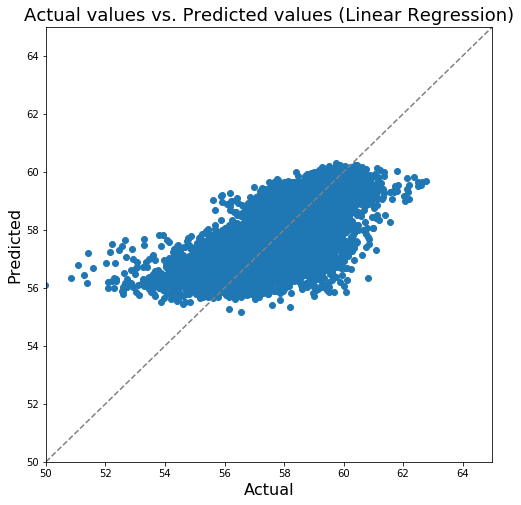

In [21]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Linear Regression)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [22]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
model_Lasso_st = Lasso().fit(X_train_RB, Y_train)
model_Lasso_ma = Lasso().fit(X_train_MA, Y_train)

train_y_pred_st = model_Lasso_st.predict(X_train_RB)
train_y_pred_ma = model_Lasso_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_Lasso_st.predict(X_test_RB)
test_y_pred_ma = model_Lasso_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
RobustScaler
Training MSE : 0.980
Training RMSE : 0.990
Training MAE : 0.723
Training MAPE : 1.253
Training R2 : 0.001

MaxAbsScaler
Training MSE : 0.981
Training RMSE : 0.990
Training MAE : 0.723
Training MAPE : 1.254
Training R2 : -0.000

=============Test=============
RobustScaler
Training MSE : 1.014
Training RMSE : 1.007
Training MAE : 0.736
Training MAPE : 1.277
Training R2 : 0.001

MaxAbsScaler
Training MSE : 1.015
Training RMSE : 1.007
Training MAE : 0.736
Training MAPE : 1.277
Training R2 : -0.000


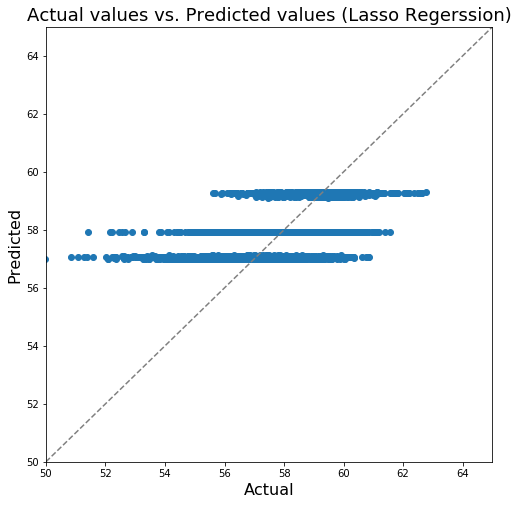

In [23]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Lasso Regerssion)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [24]:
model_Ridge_st = Ridge().fit(X_train_RB, Y_train)
model_Ridge_ma = Ridge().fit(X_train_MA, Y_train)

train_y_pred_st = model_Ridge_st.predict(X_train_RB)
train_y_pred_ma = model_Ridge_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_Ridge_st.predict(X_test_RB)
test_y_pred_ma = model_Ridge_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
RobustScaler
Training MSE : 0.785
Training RMSE : 0.886
Training MAE : 0.658
Training MAPE : 1.139
Training R2 : 0.194

MaxAbsScaler
Training MSE : 0.797
Training RMSE : 0.893
Training MAE : 0.660
Training MAPE : 1.143
Training R2 : 0.181

=============Test=============
RobustScaler
Training MSE : 0.823
Training RMSE : 0.907
Training MAE : 0.671
Training MAPE : 1.162
Training R2 : 0.184

MaxAbsScaler
Training MSE : 0.825
Training RMSE : 0.908
Training MAE : 0.671
Training MAPE : 1.162
Training R2 : 0.182


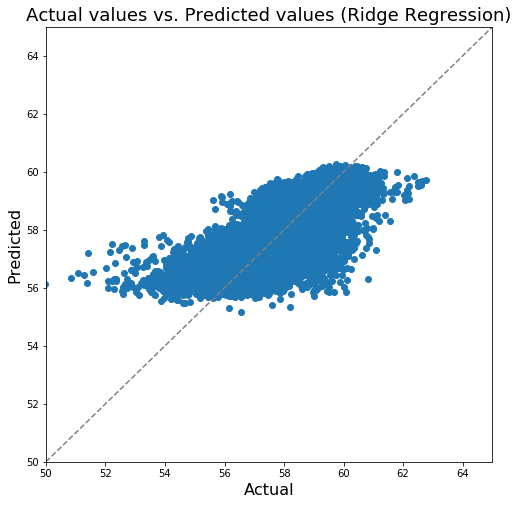

In [25]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Ridge Regression)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [26]:
model_Elastic_st = ElasticNet().fit(X_train_RB, Y_train)
model_Elastic_ma = ElasticNet().fit(X_train_MA, Y_train)

train_y_pred_st = model_Elastic_st.predict(X_train_RB)
train_y_pred_ma = model_Elastic_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_Elastic_st.predict(X_test_RB)
test_y_pred_ma = model_Elastic_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
RobustScaler
Training MSE : 0.980
Training RMSE : 0.990
Training MAE : 0.722
Training MAPE : 1.253
Training R2 : 0.001

MaxAbsScaler
Training MSE : 0.981
Training RMSE : 0.990
Training MAE : 0.723
Training MAPE : 1.254
Training R2 : -0.000

=============Test=============
RobustScaler
Training MSE : 1.014
Training RMSE : 1.007
Training MAE : 0.736
Training MAPE : 1.276
Training R2 : 0.001

MaxAbsScaler
Training MSE : 1.015
Training RMSE : 1.007
Training MAE : 0.736
Training MAPE : 1.277
Training R2 : -0.000


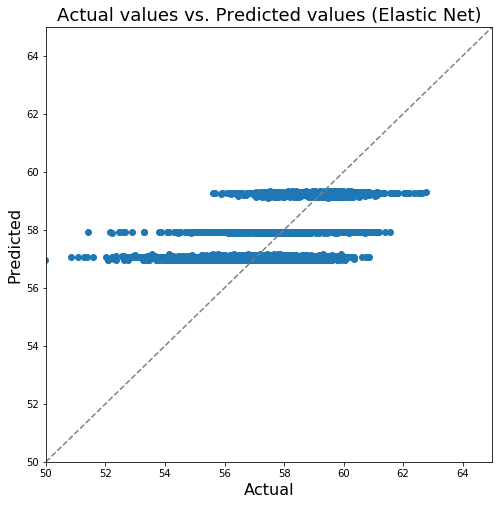

In [27]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Elastic Net)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [28]:
# # 변수 선택 : 1. 다중공선성 제거
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(x_iqr.values, i) for i in range(x_iqr.shape[1])]
# vif["features"] = x_iqr.columns

# new_columns = list(vif.loc[vif["VIF Factor"]<10]['features'])

# # 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
# new_X_train, new_X_valid, Y_train, Y_valid = train_test_split(x_iqr[new_columns], y_iqr, test_size=0.4, random_state=2021)
# new_X_vaild, new_X_test, Y_valid, Y_test = train_test_split(new_X_valid, Y_valid, test_size=0.25, random_state=2021)

# # RobustScaler
# Robust_scaler = RobustScaler()
# Robust_scaler.fit(new_X_train)
# new_X_train_RB = Robust_scaler.transform(new_X_train)
# new_X_test_RB = Robust_scaler.transform(new_X_test)

# # MaxAbsScaler
# MA_scaler = MaxAbsScaler()
# MA_scaler.fit(new_X_train)
# new_X_train_MA = MA_scaler.transform(new_X_train)
# new_X_test_MA = MA_scaler.transform(new_X_test)

In [29]:
from sklearn.tree import DecisionTreeRegressor

model_dtr_st = DecisionTreeRegressor(max_depth=10).fit(X_train_RB, Y_train)
model_dtr_ma = DecisionTreeRegressor(max_depth=10).fit(X_train_MA, Y_train)

train_y_pred_st = model_dtr_st.predict(X_train_RB)
train_y_pred_ma = model_dtr_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_dtr_st.predict(X_test_RB)
test_y_pred_ma = model_dtr_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
RobustScaler
Training MSE : 0.547
Training RMSE : 0.740
Training MAE : 0.537
Training MAPE : 0.929
Training R2 : 0.441

MaxAbsScaler
Training MSE : 0.548
Training RMSE : 0.740
Training MAE : 0.537
Training MAPE : 0.929
Training R2 : 0.440

=============Test=============
RobustScaler
Training MSE : 0.770
Training RMSE : 0.877
Training MAE : 0.633
Training MAPE : 1.095
Training R2 : 0.242

MaxAbsScaler
Training MSE : 0.763
Training RMSE : 0.874
Training MAE : 0.631
Training MAPE : 1.092
Training R2 : 0.249


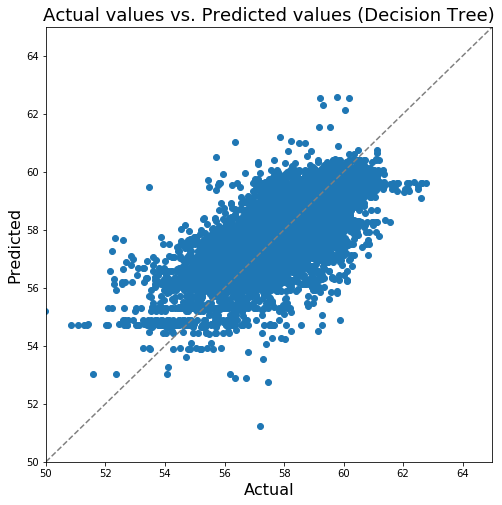

In [30]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Decision Tree)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
model_rfr_st = RandomForestRegressor(max_depth=103).fit(X_train_RB, Y_train)
model_rfr_ma = RandomForestRegressor(max_depth=103).fit(X_train_MA, Y_train)

train_y_pred_st = model_rfr_st.predict(X_train_RB)
train_y_pred_ma = model_rfr_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_rfr_st.predict(X_test_RB)
test_y_pred_ma = model_rfr_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

=============Train=============
RobustScaler
Training MSE : 0.082
Training RMSE : 0.286
Training MAE : 0.207
Training MAPE : 0.359
Training R2 : 0.917

MaxAbsScaler
Training MSE : 0.082
Training RMSE : 0.286
Training MAE : 0.208
Training MAPE : 0.359
Training R2 : 0.917

=============Test=============
RobustScaler
Training MSE : 0.605
Training RMSE : 0.778
Training MAE : 0.569
Training MAPE : 0.984
Training R2 : 0.408

MaxAbsScaler
Training MSE : 0.604
Training RMSE : 0.777
Training MAE : 0.568
Training MAPE : 0.982
Training R2 : 0.409


In [39]:
max_depths = list(range(100,110)) + [None]
print(max_depths)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, None]


In [40]:
# 평가 지표 저장
rmse_valid = []
mae_valid = []

In [41]:
for max_depth in max_depths:
                     
    # 모델 학습
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train_RB, Y_train)
    
    # validation 예측
    y_valid_pred = model.predict(X_test_RB)
    
    # 모델 평가 결과 저장
    rmse = np.sqrt(mean_squared_error(Y_test, y_valid_pred))
    mae = mean_absolute_error(Y_test, y_valid_pred)
    
    rmse_valid.append(rmse)
    mae_valid.append(mae)

In [42]:
xticks = list(map(str, max_depths))
print(xticks)

['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', 'None']


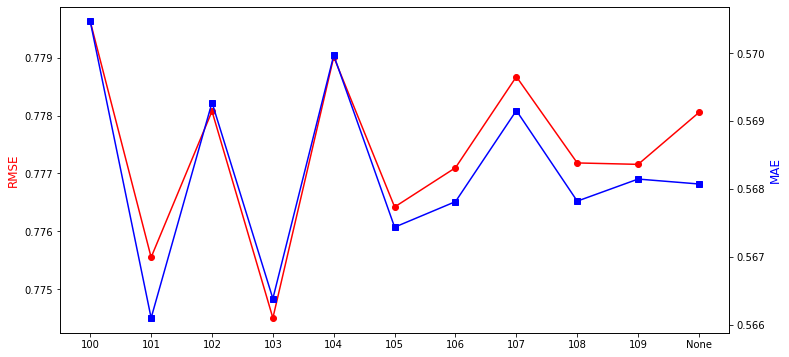

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Random Forest Regression)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
model_mlp_st = MLPRegressor().fit(X_train_RB, Y_train)
model_mlp_ma = MLPRegressor().fit(X_train_MA, Y_train)

train_y_pred_st = model_mlp_st.predict(X_train_RB)
train_y_pred_ma = model_mlp_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_mlp_st.predict(X_test_RB)
test_y_pred_ma = model_mlp_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (MLP Regression)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [ ]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model_xgb_st = xgb_model.fit(X_train_RB, Y_train)
model_xgb_ma = xgb_model.fit(X_train_MA, Y_train)

train_y_pred_st = model_xgb_st.predict(X_train_RB)
train_y_pred_ma = model_xgb_ma.predict(X_train_MA)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

test_y_pred_st = model_xgb_st.predict(X_test_RB)
test_y_pred_ma = model_xgb_ma.predict(X_test_MA)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))

print('\nMaxAbsScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_ma)))

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (XGBoost)', size=18)
plt.scatter(Y_test, test_y_pred_st)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65]) 
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

In [ ]:
# import torch
# import torch.nn as nn
# from torch.nn import functional as F
# from torch.autograd import Variable

# torch.manual_seed(0)

In [ ]:
# class MLP_RRegressor(nn.Module):
#     def __init__(self, in_features):
#         super().__init__()
#         self.layer_1 = nn.Linear(in_features,80)
#         self.layer_2 = nn.Linear(80,20)
#         self.layer_out = nn.Linear(20, 1)
        
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.05)
        
#         torch.nn.init.xavier_uniform_(self.layer_1.weight)
#         torch.nn.init.xavier_uniform_(self.layer_2.weight)
        
#     def forward(self, inputs):
#         x = self.relu(self.layer_1(inputs))
#         x = self.relu(self.layer_2(x))
#         x = self.dropout(x)
#         x = self.layer_out(x)
#         return x    

# class Net(nn.Module):
#     def __init__(self, in_features):
#         super().__init__()
#         self.fc1 = nn.Linear(in_features, 216)
#         self.fc2 = nn.Linear(216, 72)
#         self.fc3 = nn.Linear(72, 18)
#         self.fc4 = nn.Linear(18, 1)

#         self.dropout = nn.Dropout(p=0.5)

#     def forward(self, x):

#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         return x

In [ ]:
# save_dir = './output'
# os.makedirs(save_dir, exist_ok=True)

In [ ]:
# from torch.utils.data import Dataset, DataLoader

# class CustomDataset(Dataset):
#     def __init__(self, x_data, y_data):
#         self.x_data = x_data
#         self.y_data = y_data

#     def __getitem__(self, idx):
#         self.x_data = torch.FloatTensor(self.x_data)
#         self.y_data = torch.FloatTensor(self.y_data)
#         return self.x_data[idx], self.y_data[idx]

#     def __len__(self):
#         return len(self.x_data)
    
# class testData(Dataset):    
#     def __init__(self, x_data):
#         self.x_data = x_data
        
#     def __getitem__(self, idx):
#         self.x_data = torch.FloatTensor(self.x_data)
#         return self.x_data[idx]
        
#     def __len__ (self):
#         return len(self.x_data)

In [ ]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(torch.cuda.is_available())

# train_data = CustomDataset(X_train_SD, Y_train)
# val_data = CustomDataset(X_valid_SD, Y_valid)
# test_data = testData(X_test_SD)

# xtr_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# xvl_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=True)
# xts_loader = torch.utils.data.DataLoader(test_data, batch_size=128)

In [ ]:
# import collections

# model = MLP_RRegressor(in_features=X_train.shape[1]).to(device)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0)

# epochs = 500

# base_loss = 100000

# model_hist = collections.namedtuple('Model','epoch loss val_loss')
# model_loss = model_hist(epoch = [], loss = [], val_loss = [])
# try: c = model_loss.epoch[-1]
# except: c = 0
# for epoch in range(epochs):
#     model.train()
#     for xt, yt in xtr_loader:
#         xt = xt.to(device)
#         yt = yt.to(device)
#         optimizer.zero_grad()

#         y_pred = model(xt)
#         loss = criterion(y_pred, yt)      
#         loss.backward()
#         optimizer.step()
#         scheduler.step()
        
#     model.eval()
#     tot_val_loss = 0
#     with torch.no_grad():
#         for val_x, val_y in xvl_loader:
#             val_x = val_x.to(device)
#             val_y = val_y.to(device)
#             val_y_pred = model(val_x)
#             tot_val_loss += criterion(val_y_pred, val_y).item()

#     model_loss.epoch.append(c+epoch)
#     model_loss.loss.append(loss.item())
#     model_loss.val_loss.append(np.mean(tot_val_loss))
#     print(f'Epoch: {epoch}   Train_Loss: {loss.item():.4f}    Val_Loss: {np.mean(tot_val_loss):.4f}')
#     if np.mean(tot_val_loss) <= base_loss:
#         base_loss = np.mean(tot_val_loss)
#         best_model = model.state_dict()
#         best_epoch = epoch
#         print(f'best_model(epoch:{epoch}) is saved!')
#     torch.save(best_model, os.path.join(save_dir, f'Neural_Networks_{best_epoch}.pth'))

In [ ]:
# y_pred_list = []
# model.eval()
# with torch.no_grad():
#     for X_batch in xts_loader:
#         X_batch = X_batch.to(device)
#         y_test_pred = model(X_batch)
#         y_pred_list.extend(y_test_pred.cpu().numpy())
        
# y_pred_list2 = []
# model.eval()
# with torch.no_grad():
#     for X_batch, y in xtr_loader:
#         X_batch = X_batch.to(device)
#         y_test_pred = model(X_batch)
#         y_pred_list2.extend(y_test_pred.cpu().numpy())

In [ ]:
# print('\n=============Test=============')
# print('RobustScaler')
# print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, y_pred_list2)))
# print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, y_pred_list2))))
# print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, y_pred_list2)))
# print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, y_pred_list2)))
# print("Training R2 : {:.3f}".format(r2_score(Y_train, y_pred_list2)))

# print('\nMaxAbsScaler')
# print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, y_pred_list)))
# print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, y_pred_list))))
# print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, y_pred_list)))
# print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, y_pred_list)))
# print("Training R2 : {:.3f}".format(r2_score(Y_test, y_pred_list)))

In [ ]:
# y_pred_list

In [ ]:
# plt.figure(figsize=(8, 8))
# plt.title('Actual values vs. Predicted values (te Data)', size=18)
# plt.scatter(Y_train, y_pred_list2)
# plt.xlabel('Actual', size=16)
# plt.ylabel('Predicted', size=16)
# plt.axis([50, 65, 50, 65]) 
# plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
# plt.show()